

#Data Description

$cli_gdp_proxy
$cli_gdp_proxy$mean
[1] 99.95682

$cli_gdp_proxy$median
[1] 100.091

$cli_gdp_proxy$sd
[1] 1.287266

$cli_gdp_proxy$variance
[1] 1.657053

$cli_gdp_proxy$IQR
[1] 1.53537

$cli_gdp_proxy$min
[1] 93.4837

$cli_gdp_proxy$max
[1] 103.4109

$cli_gdp_proxy$percentile_25
     25% 
99.26323 

$cli_gdp_proxy$percentile_50
    50% 
100.091 

$cli_gdp_proxy$percentile_75
     75% 
100.7986 


$fedfunds
$fedfunds$mean
[1] 4.794694

$fedfunds$median
[1] 4.73

$fedfunds$sd
[1] 3.669006

$fedfunds$variance
[1] 13.4616

$fedfunds$IQR
[1] 4.65

$fedfunds$min
[1] 0.05

$fedfunds$max
[1] 19.1

$fedfunds$percentile_25
 25% 
1.91 

$fedfunds$percentile_50
 50% 
4.73 

$fedfunds$percentile_75
 75% 
6.56 


$unrate
$unrate$mean
[1] 5.913394

$unrate$median
[1] 5.6

$unrate$sd
[1] 1.695157

$unrate$variance
[1] 2.873557

$unrate$IQR
[1] 2.3

$unrate$min
[1] 3.4

$unrate$max
[1] 14.8

$unrate$percentile_25
25% 
4.7 

$unrate$percentile_50
50% 
5.6 

$unrate$percentile_75
75% 
  7 


$cpi
$cpi$mean
[1] 138.1028

$cpi$median
[1] 138.3

$cpi$sd
[1] 81.12896

$cpi$variance
[1] 6581.908

$cpi$IQR
[1] 155.645

$cpi$min
[1] 29.37

$cpi$max
[1] 309.685

$cpi$percentile_25
 25% 
55.8 

$cpi$percentile_50
  50% 
138.3 

$cpi$percentile_75
    75% 
211.445 


$bbk_gdp
$bbk_gdp$mean
[1] 2.953474

$bbk_gdp$median
[1] 3.064035

$bbk_gdp$sd
[1] 5.567072

$bbk_gdp$variance
[1] 30.99229

$bbk_gdp$IQR
[1] 4.224206

$bbk_gdp$min
[1] -71.47769

$bbk_gdp$max
[1] 45.3907

$bbk_gdp$percentile_25
     25% 
0.944365 

$bbk_gdp$percentile_50
     50% 
3.064035 

$bbk_gdp$percentile_75
     75% 
5.168571

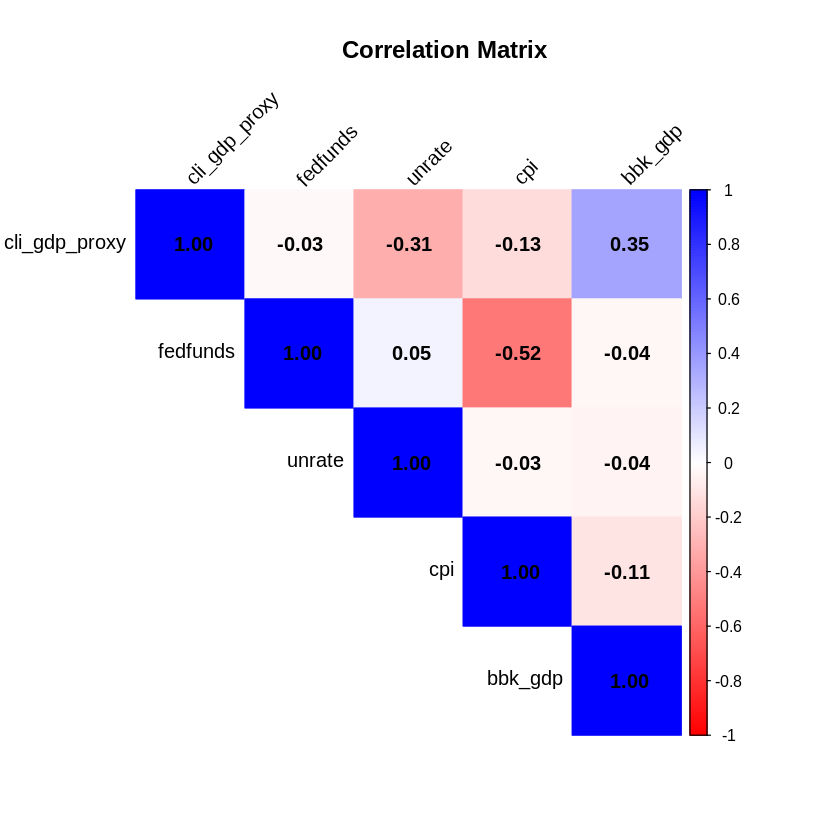

In [ ]:
# Install necessary packages
if(!require("corrplot")) install.packages('corrplot')
if(!require("dplyr")) install.packages('dplyr')

# Load necessary libraries
library(dplyr)
library(corrplot)

# Load datasets
datasets <- list(
  cli_gdp_proxy = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=USALOLITONOSTSAM",
  fedfunds = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS",
  unrate = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE",
  cpi = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL",
  bbk_gdp = "https://fred.stlouisfed.org/graph/fredgraph.csv?id=BBKMGDP"
)

# Read datasets and rename columns
data_list <- lapply(names(datasets), function(name) {
  data <- read.csv(datasets[[name]], stringsAsFactors = FALSE)
  colnames(data) <- c("Date", name)
  return(data)
})

# Merge datasets on the Date column
merged_data <- Reduce(function(x, y) inner_join(x, y, by = "Date"), data_list)

# Convert columns to numeric
merged_data <- merged_data %>%
  mutate(across(-Date, as.numeric)) %>%
  filter(complete.cases(.)) # Remove rows with NA values

# Function to calculate descriptive statistics
calculate_stats <- function(data) {
  stats <- list(
    mean = mean(data, na.rm = TRUE),
    median = median(data, na.rm = TRUE),
    sd = sd(data, na.rm = TRUE),
    variance = var(data, na.rm = TRUE),
    IQR = IQR(data, na.rm = TRUE),
    min = min(data, na.rm = TRUE),
    max = max(data, na.rm = TRUE),
    percentile_25 = quantile(data, 0.25, na.rm = TRUE),
    percentile_50 = quantile(data, 0.50, na.rm = TRUE),
    percentile_75 = quantile(data, 0.75, na.rm = TRUE)
  )
  return(stats)
}

# Calculate statistics for each variable
stats_list <- lapply(merged_data %>% dplyr::select(-Date), calculate_stats)

# Display descriptive statistics
names(stats_list) <- colnames(merged_data %>% dplyr::select(-Date))
stats_list

# Calculate the correlation matrix
cor_matrix <- cor(merged_data %>% dplyr::select(-Date))

# Visualize the correlation matrix with a gradient of colors
corrplot(cor_matrix, method = "color", col = colorRampPalette(c("red", "white", "blue"))(200),
         type = "upper", tl.col = "black", tl.srt = 45, addCoef.col = "black")

title("Correlation Matrix")


# TS Models (Baseline)


Checking stationarity of in-sample data:


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 GDPPROXY :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -4.2483, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


 FEDFUNDS :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -3.4889, Lag order = 7, p-value = 0.04369
alternative hypothesis: stationary


 UNRATE :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -2.7096, Lag order = 7, p-value = 0.2776
alternative hypothesis: stationary


 CPIAUCSL :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -2.5241, Lag order = 7, p-value = 0.356
alternative hypothesis: stationary

Checking stationarity of differenced variables:


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 Differenced CPI :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -7.7952, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


 Differenced UNRATE :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -3.8976, Lag order = 7, p-value = 0.01428
alternative hypothesis: stationary

[1] "Best lag order based on BIC : 4"


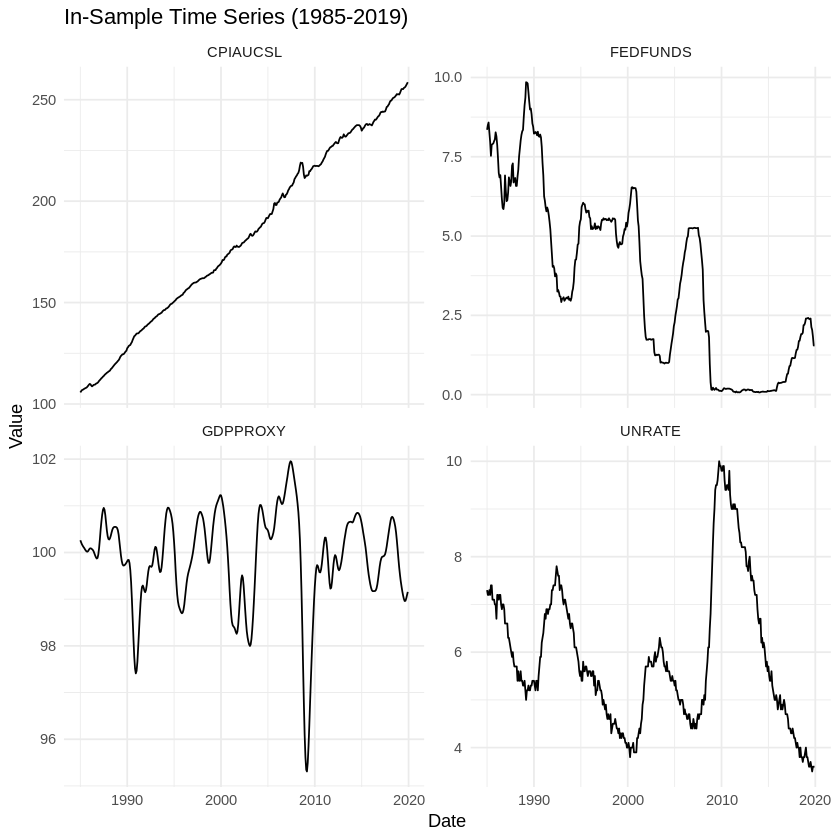

Series: fedfunds_ts 
ARIMA(5,0,3) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ar5     ma1     ma2      ma3    mean
      1.2172  -0.2531  0.9505  -1.2026  0.2844  0.2135  0.1970  -0.7376  3.8993
s.e.  0.1072   0.1047  0.0647   0.1007  0.0775  0.0923  0.0941   0.0806  1.3559

sigma^2 = 0.02583:  log likelihood = 172.08
AIC=-324.15   AICc=-323.61   BIC=-283.8

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.005502185 0.1589756 0.1001244 -2.603118 7.316122 0.1001441
                     ACF1
Training set 0.0001025428

 [1]  0.22535036  0.22535036 -0.27119631 -0.07508341  0.04231623  0.09015037
 [7]  0.03169138  0.07307559  0.11642964  0.03998713  0.09690971  0.13133767
[13]  0.03746225  0.07364775  0.11861579  0.02678112  0.10070989  0.15787619
[19]  0.06119259  0.08973135  0.13318478  0.06207888  0.09697086  0.13917340
[25]  0.06625956  0.26962859  0.45088503  0.96642960  1.46749453  2.00530079
[31]  2.69102447  2.78183036  3.46410257  4.20002487  4.41238183  4.59631825
[37]  4.75212987  4.80993168  5.02700328  5.20428295  5.17956173  5.21604744
[43]  5.42949349  5.39700408  5.38834952  5.30830044
$selection
AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      4      4      5 

$criteria
                   1             2             3             4             5
AIC(n) -1.261956e+01 -1.554664e+01 -1.728615e+01 -1.814152e+01 -1.818552e+01
HQ(n)  -1.254250e+01 -1.540793e+01 -1.708579e+01 -1.787951e+01 -1.786186e+01
SC(n)  -1.242472e+01 -1.519593e+01 -1.677956e+01 -1.747907e+01 -1.736719e+01
FPE(n)  3.306716e-06

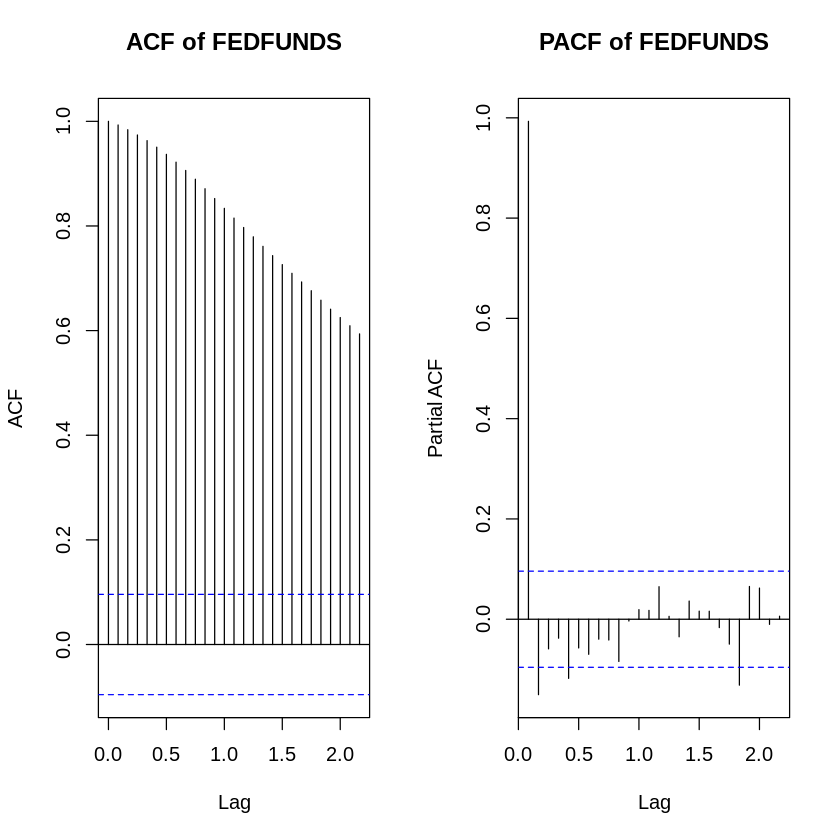

  Model      RMSE
1    AR 0.1493011
2 ARIMA 0.1465815
3   VAR 0.3752266
4   AR1 0.2357057


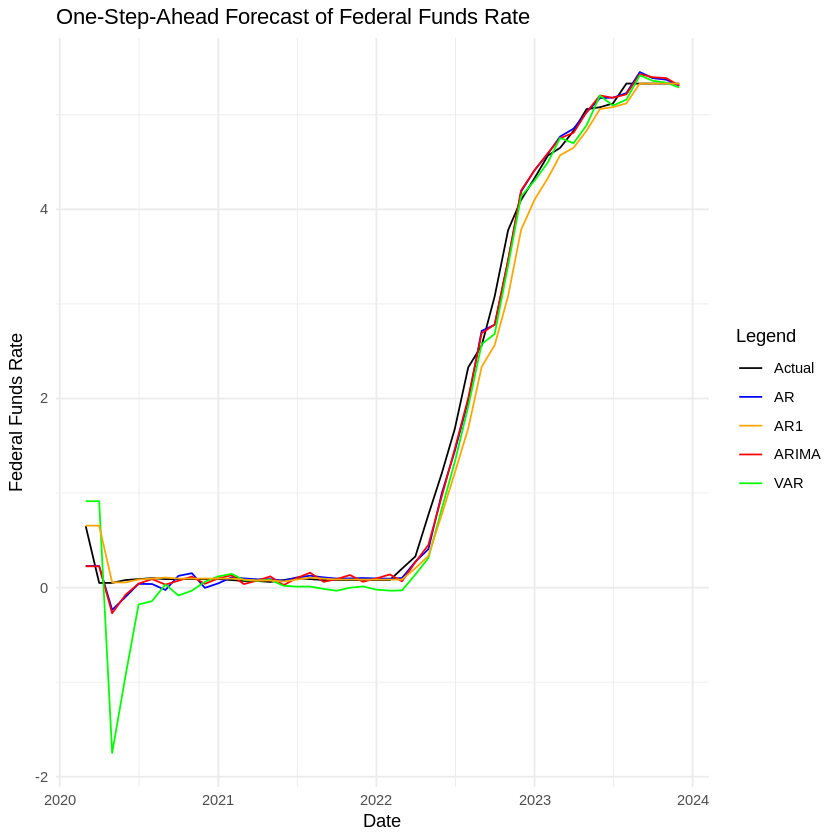

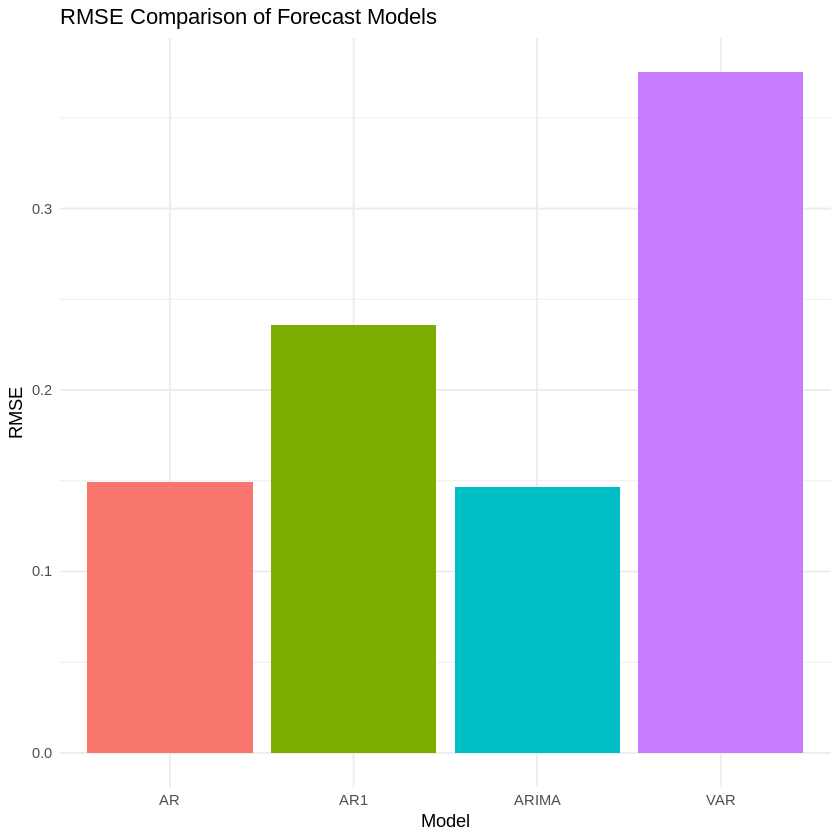

In [ ]:
# Conditionally install required packages
if (!require(forecast)) install.packages("forecast")
if (!require(vars)) install.packages("vars")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(tseries)) install.packages("tseries")
if (!require(ggplot2)) install.packages("ggplot2")

# Load required libraries
library(forecast)
library(vars)
library(tidyverse)
library(tseries)
library(ggplot2)


# Load the datasets
cli_gdp_proxy <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=USALOLITONOSTSAM", stringsAsFactors = FALSE)
fedfunds <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS", stringsAsFactors = FALSE)
unrate <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE", stringsAsFactors = FALSE)
cpi <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL", stringsAsFactors = FALSE)

# Convert DATE columns to Date type and align data
cli_gdp_proxy$DATE <- as.Date(cli_gdp_proxy$DATE)
fedfunds$DATE <- as.Date(fedfunds$DATE)
unrate$DATE <- as.Date(unrate$DATE)
cpi$DATE <- as.Date(cpi$DATE)

# Merge all datasets on DATE
data <- reduce(
  list(cli_gdp_proxy, fedfunds, unrate, cpi),
  full_join,
  by = "DATE"
)
colnames(data) <- c("DATE", "GDPPROXY", "FEDFUNDS", "UNRATE", "CPIAUCSL")

# Filter training data (1985-01 to 2019-12)
train_data <- data %>%
  filter(DATE >= as.Date("1985-01-01") & DATE <= as.Date("2019-12-01"))

# Filter test data (2020-01 to 2023-12)
test_data <- data %>%
  filter(DATE >= as.Date("2020-01-01") & DATE <= as.Date("2023-12-01"))

# Prepare time series objects
cli_gdp_proxy_ts <- ts(train_data$GDPPROXY, start = c(1985, 1), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 1), frequency = 12)
unrate_ts <- ts(train_data$UNRATE, start = c(1985, 1), frequency = 12)
cpi_ts <- ts(train_data$CPIAUCSL, start = c(1985, 1), frequency = 12)

# Plot the 4 time series in separate diagrams
plot_data <- train_data %>%
  dplyr::select(DATE, GDPPROXY, FEDFUNDS, UNRATE, CPIAUCSL) %>%
  pivot_longer(
    cols = -DATE,
    names_to = "Variable",
    values_to = "Value"
  )

ggplot(plot_data, aes(x = DATE, y = Value)) +
  geom_line() +
  facet_wrap(~ Variable, scales = "free_y") + # Separate panels for each variable
  labs(
    title = "In-Sample Time Series (1985-2019)",
    x = "Date",
    y = "Value"
  ) +
  theme_minimal()

# Check for non-stationarity using the Augmented Dickey-Fuller (ADF) test
check_stationarity <- function(ts_data, variable_name) {
  adf_result <- adf.test(ts_data, alternative = "stationary")
  cat("\n", variable_name, ":\n")
  print(adf_result)
}

cat("Checking stationarity of in-sample data:\n")
check_stationarity(cli_gdp_proxy_ts, "GDPPROXY")
check_stationarity(fedfunds_ts, "FEDFUNDS")
check_stationarity(unrate_ts, "UNRATE")
check_stationarity(cpi_ts, "CPIAUCSL")

# Take first differences for CPI and UNRATE
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)
unrate_diff_ts <- ts(train_data$UNRATE_diff, start = c(1985, 2), frequency = 12)

cat("Checking stationarity of differenced variables:\n")
check_stationarity(cpi_diff_ts, "Differenced CPI")
check_stationarity(unrate_diff_ts, "Differenced UNRATE")


### the following steps are necessary for the VAR
# Remove the first observation from differenced variables to match lengths
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  slice(-1)  # Remove the first row to drop NAs from differencing

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  slice(-1)  # Remove the first row to drop NAs from differencing

# Create time series objects with adjusted data
cli_gdp_proxy_ts <- ts(train_data$GDPPROXY, start = c(1985, 2), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 2), frequency = 12)
cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)
unrate_diff_ts <- ts(train_data$UNRATE_diff, start = c(1985, 2), frequency = 12)





# AR Model for FEDFUNDS (One-Step Ahead Forecast)


# Define a function to calculate the AIC or BIC for different lag orders
select_ar_order <- function(ts_data, max_lag = 10, criterion = "AIC") {
  results <- data.frame(Lag = integer(), Criterion = numeric())

  for (p in 1:max_lag) {
    model <- Arima(ts_data, order = c(p, 0, 0))
    if (criterion == "AIC") {
      crit_value <- AIC(model)
    } else if (criterion == "BIC") {
      crit_value <- BIC(model)
    } else {
      stop("Invalid criterion specified. Use 'AIC' or 'BIC'.")
    }
    results <- rbind(results, data.frame(Lag = p, Criterion = crit_value))
  }

  return(results[which.min(results$Criterion), ])
}

### Lag Order Selection
max_lag_order <- 14  # Specify the maximum lag to test
criterion_to_use <- "BIC"  # Choose "AIC" or "BIC"

# Find the best lag order
best_order <- select_ar_order(fedfunds_ts, max_lag = max_lag_order, criterion = criterion_to_use)

print(paste("Best lag order based on", criterion_to_use, ":", best_order$Lag))

### AIC suggests 10 and BIC suggests 4
### We proceed with lag order of 10, since the number of observations is sufficently high


ar_model <- Arima(fedfunds_ts, order = c(10, 0, 0))  # AR(10)
ar_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(ar_forecast)) {
  ar_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]), order = c(10, 0, 0))
  ar_forecast[i] <- forecast(ar_model, h = 1)$mean
}


### We also estimate and fit an AR(1) model for reference
ar1_model <- Arima(fedfunds_ts, order = c(1, 0, 0))  # AR(1)
ar1_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(ar1_forecast)) {
  ar1_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]), order = c(1, 0, 0))
  ar1_forecast[i] <- forecast(ar1_model, h = 1)$mean
}




### ARIMA model selection
par(mfrow = c(1, 2))
acf(fedfunds_ts, main = "ACF of FEDFUNDS")
pacf(fedfunds_ts, main = "PACF of FEDFUNDS")

# Test ARIMA models with varying p and q
### We set the max lag order for p and q to 5 each, as we want the number of coefficients to be estimated to be similar to the AR model
best_model <- NULL
best_aic <- Inf  # Start with a high AIC value
max_order <- 5   # Maximum p and q to test

for (p in 0:max_order) {
  for (q in 0:max_order) {
    tryCatch({
      model <- Arima(fedfunds_ts, order = c(p, 0, q))
      aic <- AIC(model)
      if (aic < best_aic) {
        best_aic <- aic
        best_model <- model
      }
    }, error = function(e) {})
  }
}

# Best model summary
summary(best_model)




### ARIMA  (p, d, q)
arima_p <- 5  # AR order
arima_d <- 0  # Differencing order
arima_q <- 3  # MA order

# Fit ARIMA model to the training set
arima_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(arima_forecast)) {
  # Update the model with available data up to the current point
  arima_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]),
                       order = c(arima_p, arima_d, arima_q))

  # Generate one-step-ahead forecast
  arima_forecast[i] <- forecast(arima_model, h = 1)$mean
}

# Output forecasts
print(arima_forecast)



### VAR MODEL
# Define VAR Data Matrix
var_data <- cbind(
  cli_gdp_proxy_ts,
  fedfunds_ts,
  unrate_diff_ts,
  cpi_diff_ts
)


### VAR model lag order selection

lag_selection <- VARselect(var_data, lag.max = 5, type = "const")

# Display the results
print(lag_selection)

# Extract the recommended lag lengths for each criterion
cat("Lag order selected by AIC:", lag_selection$selection["AIC(n)"], "\n")
cat("Lag order selected by BIC:", lag_selection$selection["SC(n)"], "\n")
cat("Lag order selected by HQ:", lag_selection$selection["HQ(n)"], "\n")


### BIC and HQ suggest 4 lags, AIC suggests 5. We decide to proceed with the more parsimonious model


# Re-run VAR forecasting loop
var_forecast <- matrix(NA, nrow = nrow(test_data), ncol = 4)  # Initialize forecast matrix
colnames(var_forecast) <- c("GDPPROXY", "FEDFUNDS", "UNRATE_diff", "CPIAUCSL_diff")

#This code dynamically updates the training data as new observations from the test set become available, fits a new VAR model, and generates one-step-ahead forecasts at each step.

for (i in 1:nrow(var_forecast)) {
  # Combine training data with test data up to the current step
  updated_test <- na.omit(test_data[1:(i - 1), c("GDPPROXY", "FEDFUNDS", "UNRATE_diff", "CPIAUCSL_diff")])
  updated_data <- rbind(var_data, as.matrix(updated_test))

  # Fit the VAR model
  var_model <- VAR(updated_data, p = 4)

  # Generate one-step-ahead forecast
  forecast_result <- predict(var_model, n.ahead = 1)

  # Store the forecasted values
  var_forecast[i, ] <- sapply(forecast_result$fcst, function(x) x[1, 1])
}

# Combine forecasts and actual values for visualization
forecast_results_baseline <- data.frame(
  DATE = test_data$DATE,
  Actual_FEDFUNDS = test_data$FEDFUNDS,
  AR = ar_forecast,
  ARIMA = arima_forecast,
  AR1 = ar1_forecast,
  VAR = var_forecast[, "FEDFUNDS"]
)

# Plot forecasts with actual values
ggplot(data = forecast_results_baseline, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = AR, color = "AR")) +
  geom_line(aes(y = ARIMA, color = "ARIMA")) +
  geom_line(aes(y = VAR, color = "VAR")) +
  geom_line(aes(y = AR1, color = "AR1")) +
  labs(title = "One-Step-Ahead Forecast of Federal Funds Rate",
       y = "Federal Funds Rate",
       x = "Date") +
  scale_color_manual(
    values = c("Actual" = "black", "AR" = "blue", "ARIMA" = "red", "VAR" = "green", "AR1" = "orange" ),
    name = "Legend"
  ) +
  theme_minimal()

# Calculate RMSE for each forecast
ar_rmse <- sqrt(mean((forecast_results_baseline$Actual_FEDFUNDS - forecast_results_baseline$AR)^2, na.rm = TRUE))
arima_rmse <- sqrt(mean((forecast_results_baseline$Actual_FEDFUNDS - forecast_results_baseline$ARIMA)^2, na.rm = TRUE))
var_rmse <- sqrt(mean((forecast_results_baseline$Actual_FEDFUNDS - forecast_results_baseline$VAR)^2, na.rm = TRUE))
ar1_rmse <- sqrt(mean((forecast_results_baseline$Actual_FEDFUNDS - forecast_results_baseline$AR1)^2, na.rm = TRUE))

# Display RMSE results
rmse_results_baseline <- data.frame(
  Model = c("AR", "ARIMA", "VAR", "AR1"),
  RMSE = c(ar_rmse, arima_rmse, var_rmse, ar1_rmse)
)

print(rmse_results_baseline)

# Visualization of RMSE results
ggplot(data = rmse_results_baseline, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "RMSE Comparison of Forecast Models",
       y = "RMSE",
       x = "Model") +
  theme_minimal() +
  theme(legend.position = "none")



# TS Models Zero Lower Bound


Checking stationarity of in-sample data:


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 GDPPROXY :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -4.2483, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


 FEDFUNDS :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -3.4889, Lag order = 7, p-value = 0.04369
alternative hypothesis: stationary


 UNRATE :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -2.7096, Lag order = 7, p-value = 0.2776
alternative hypothesis: stationary


 CPIAUCSL :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -2.5241, Lag order = 7, p-value = 0.356
alternative hypothesis: stationary

Checking stationarity of differenced variables:


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 Differenced CPI :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -7.7952, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


 Differenced UNRATE :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -3.8976, Lag order = 7, p-value = 0.01428
alternative hypothesis: stationary

[1] "Best lag order based on AIC : 10"
 [1] 0.22760305 0.22760305 0.00000000 0.00000000 0.03982507 0.03782975
 [7] 0.00000000 0.12441199 0.15214694 0.00000000 0.04522410 0.10920727
[13] 0.09744195 0.08724290 0.08920933 0.07331793 0.10730220 0.12594803
[19] 0.10814076 0.09574518 0.09758049 0.10120921 0.09723489 0.09479131
[25] 0.10146514 0.27425841 0.40720655 0.99838756 1.44595608 1.97848582
[31] 2.71485672 2.77960781 3.45670225 4.18758667 4.41493160 4.58823971
[37] 4.76954994 4.85304415 5.02620031 5.17599577 5.18118978 5.22930596
[43] 5.45168057 5.38737428 5.37129105 5.30712350


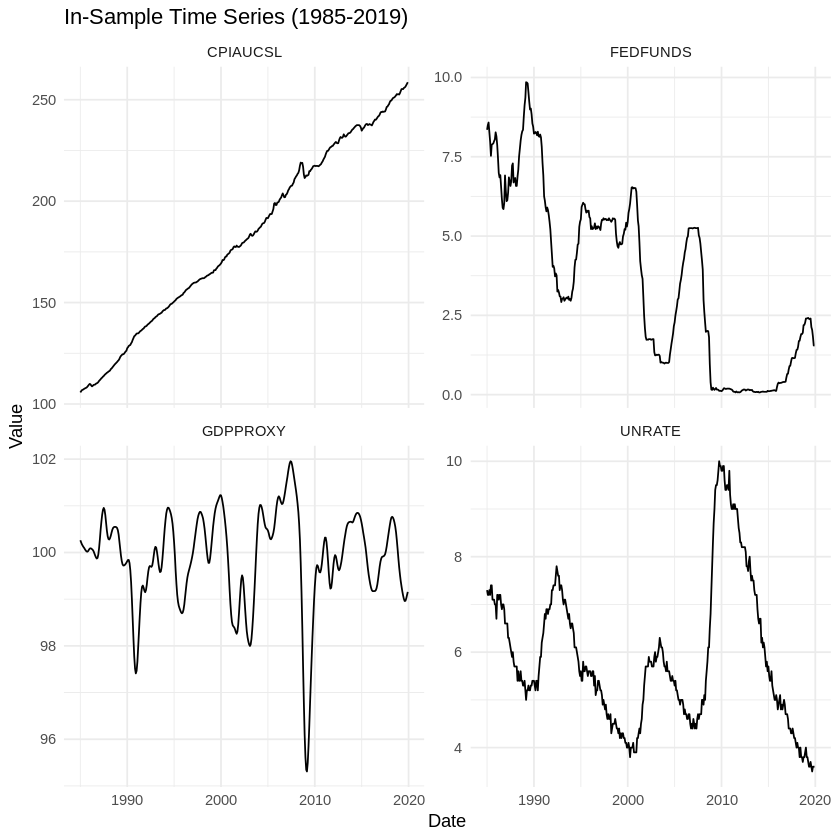

Series: fedfunds_ts 
ARIMA(5,0,3) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ar5     ma1     ma2      ma3    mean
      1.2172  -0.2531  0.9505  -1.2026  0.2844  0.2135  0.1970  -0.7376  3.8993
s.e.  0.1072   0.1047  0.0647   0.1007  0.0775  0.0923  0.0941   0.0806  1.3559

sigma^2 = 0.02583:  log likelihood = 172.08
AIC=-324.15   AICc=-323.61   BIC=-283.8

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.005502185 0.1589756 0.1001244 -2.603118 7.316122 0.1001441
                     ACF1
Training set 0.0001025428

 [1] 0.22535036 0.22535036 0.00000000 0.00000000 0.04231623 0.09015037
 [7] 0.03169138 0.07307559 0.11642964 0.03998713 0.09690971 0.13133767
[13] 0.03746225 0.07364775 0.11861579 0.02678112 0.10070989 0.15787619
[19] 0.06119259 0.08973135 0.13318478 0.06207888 0.09697086 0.13917340
[25] 0.06625956 0.26962859 0.45088503 0.96642960 1.46749453 2.00530079
[31] 2.69102447 2.78183036 3.46410257 4.20002487 4.41238183 4.59631825
[37] 4.75212987 4.80993168 5.02700328 5.20428295 5.17956173 5.21604744
[43] 5.42949349 5.39700408 5.38834952 5.30830044
$selection
AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      4      4      5 

$criteria
                   1             2             3             4             5
AIC(n) -1.261956e+01 -1.554664e+01 -1.728615e+01 -1.814152e+01 -1.818552e+01
HQ(n)  -1.254250e+01 -1.540793e+01 -1.708579e+01 -1.787951e+01 -1.786186e+01
SC(n)  -1.242472e+01 -1.519593e+01 -1.677956e+01 -1.747907e+01 -1.736719e+01
FPE(n)  3.306716e-06  1.770888e-07  3.109979e-08  1.322262e-08  1.

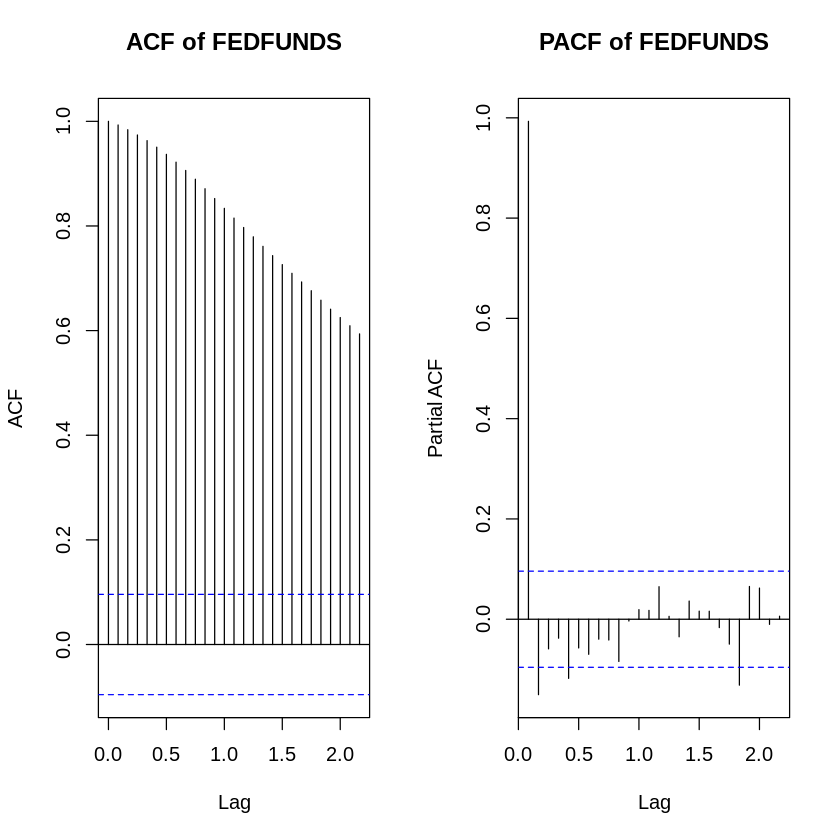

  Model      RMSE
1    AR 0.1411026
2 ARIMA 0.1375282
3   VAR 0.2117182


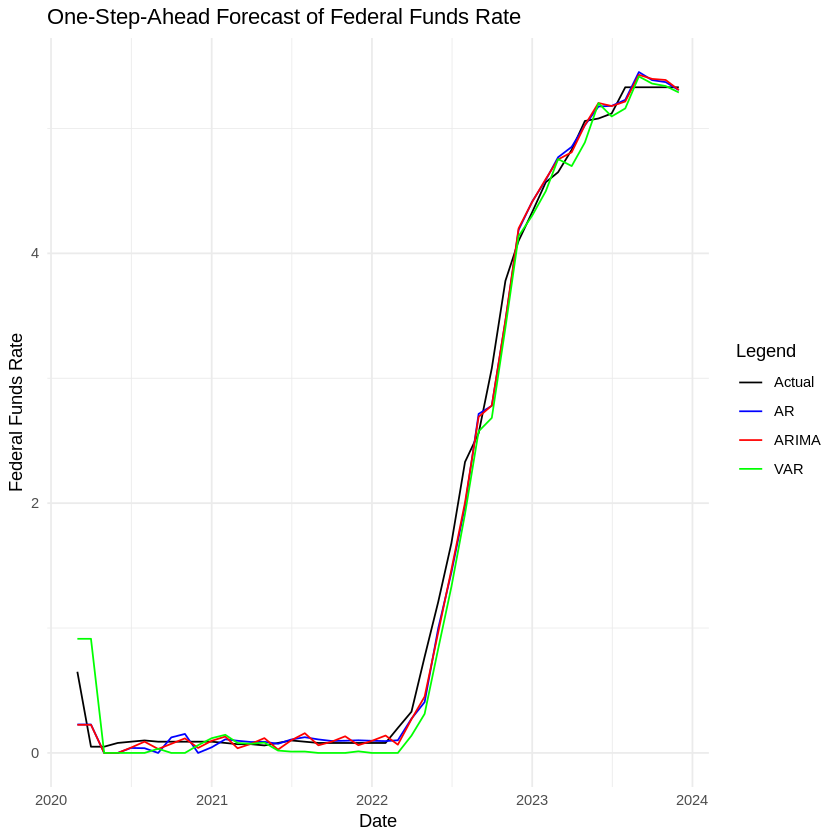

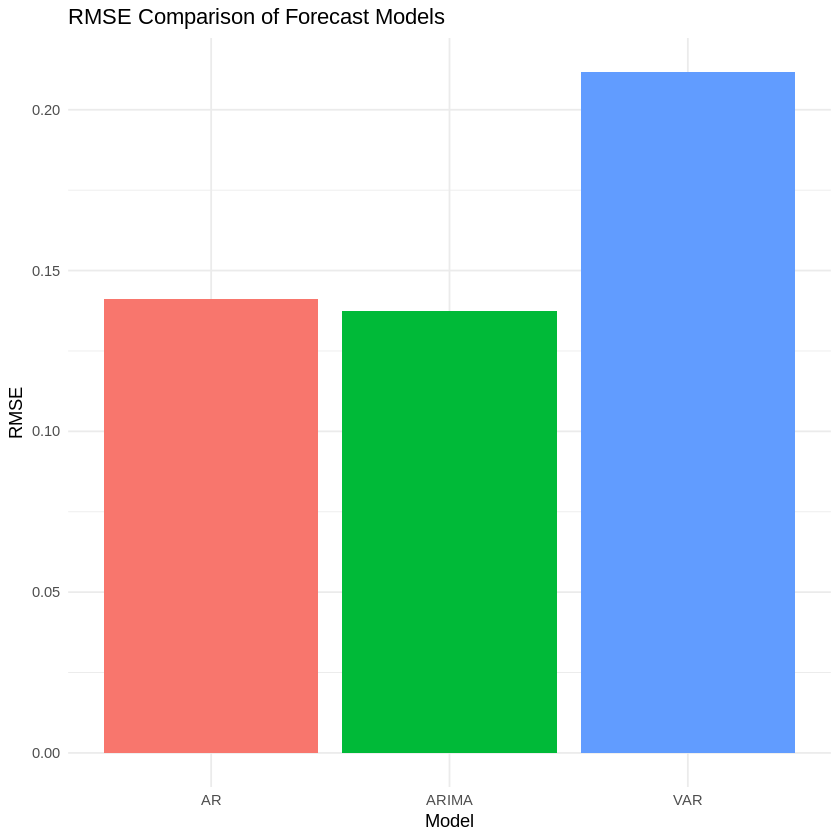

In [ ]:
# Load required libraries
library(forecast)
library(vars)
library(tidyverse)
library(tseries)
library(ggplot2)

# Load the datasets
cli_gdp_proxy <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=USALOLITONOSTSAM", stringsAsFactors = FALSE)
fedfunds <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS", stringsAsFactors = FALSE)
unrate <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE", stringsAsFactors = FALSE)
cpi <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL", stringsAsFactors = FALSE)

# Convert DATE columns to Date type and align data
cli_gdp_proxy$DATE <- as.Date(cli_gdp_proxy$DATE)
fedfunds$DATE <- as.Date(fedfunds$DATE)
unrate$DATE <- as.Date(unrate$DATE)
cpi$DATE <- as.Date(cpi$DATE)

# Merge all datasets on DATE
data <- reduce(
  list(cli_gdp_proxy, fedfunds, unrate, cpi),
  full_join,
  by = "DATE"
)
colnames(data) <- c("DATE", "GDPPROXY", "FEDFUNDS", "UNRATE", "CPIAUCSL")

# Filter training data (1985-01 to 2019-12)
train_data <- data %>%
  filter(DATE >= as.Date("1985-01-01") & DATE <= as.Date("2019-12-01"))

# Filter test data (2020-01 to 2023-12)
test_data <- data %>%
  filter(DATE >= as.Date("2020-01-01") & DATE <= as.Date("2023-12-01"))

# Prepare time series objects
cli_gdp_proxy_ts <- ts(train_data$GDPPROXY, start = c(1985, 1), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 1), frequency = 12)
unrate_ts <- ts(train_data$UNRATE, start = c(1985, 1), frequency = 12)
cpi_ts <- ts(train_data$CPIAUCSL, start = c(1985, 1), frequency = 12)

# Plot the 4 time series in separate diagrams
plot_data <- train_data %>%
  dplyr::select(DATE, GDPPROXY, FEDFUNDS, UNRATE, CPIAUCSL) %>%
  pivot_longer(
    cols = -DATE,
    names_to = "Variable",
    values_to = "Value"
  )

ggplot(plot_data, aes(x = DATE, y = Value)) +
  geom_line() +
  facet_wrap(~ Variable, scales = "free_y") + # Separate panels for each variable
  labs(
    title = "In-Sample Time Series (1985-2019)",
    x = "Date",
    y = "Value"
  ) +
  theme_minimal()

# Check for non-stationarity using the Augmented Dickey-Fuller (ADF) test
check_stationarity <- function(ts_data, variable_name) {
  adf_result <- adf.test(ts_data, alternative = "stationary")
  cat("\n", variable_name, ":\n")
  print(adf_result)
}

cat("Checking stationarity of in-sample data:\n")
check_stationarity(cli_gdp_proxy_ts, "GDPPROXY")
check_stationarity(fedfunds_ts, "FEDFUNDS")
check_stationarity(unrate_ts, "UNRATE")
check_stationarity(cpi_ts, "CPIAUCSL")

# Take first differences for CPI and UNRATE
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)
unrate_diff_ts <- ts(train_data$UNRATE_diff, start = c(1985, 2), frequency = 12)

cat("Checking stationarity of differenced variables:\n")
check_stationarity(cpi_diff_ts, "Differenced CPI")
check_stationarity(unrate_diff_ts, "Differenced UNRATE")


### the following steps are necessary for the VAR
# Remove the first observation from differenced variables to match lengths
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  slice(-1)  # Remove the first row to drop NAs from differencing

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  slice(-1)  # Remove the first row to drop NAs from differencing

# Create time series objects with adjusted data
cli_gdp_proxy_ts <- ts(train_data$GDPPROXY, start = c(1985, 2), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 2), frequency = 12)
cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)
unrate_diff_ts <- ts(train_data$UNRATE_diff, start = c(1985, 2), frequency = 12)





# AR Model for FEDFUNDS (One-Step Ahead Forecast)


# Define a function to calculate the AIC or BIC for different lag orders
select_ar_order <- function(ts_data, max_lag = 10, criterion = "AIC") {
  results <- data.frame(Lag = integer(), Criterion = numeric())

  for (p in 1:max_lag) {
    model <- Arima(ts_data, order = c(p, 0, 0))
    if (criterion == "AIC") {
      crit_value <- AIC(model)
    } else if (criterion == "BIC") {
      crit_value <- BIC(model)
    } else {
      stop("Invalid criterion specified. Use 'AIC' or 'BIC'.")
    }
    results <- rbind(results, data.frame(Lag = p, Criterion = crit_value))
  }

  return(results[which.min(results$Criterion), ])
}

### Lag Order Selection
max_lag_order <- 14  # Specify the maximum lag to test
criterion_to_use <- "AIC"  # Choose "AIC" or "BIC"

# Find the best lag order
best_order <- select_ar_order(fedfunds_ts, max_lag = max_lag_order, criterion = criterion_to_use)

print(paste("Best lag order based on", criterion_to_use, ":", best_order$Lag))

ar_model <- Arima(fedfunds_ts, order = c(10, 0, 0))  # AR(10)
ar_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(ar_forecast)) {
  ar_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]), order = c(10, 0, 0))
  ar_forecast[i] <- forecast(ar_model, h = 1)$mean

  # Apply ZLB adjustment
  ar_forecast[i] <- max(ar_forecast[i], 0)
}

# Output forecasts
print(ar_forecast)



### ARIMA model selection
par(mfrow = c(1, 2))
acf(fedfunds_ts, main = "ACF of FEDFUNDS")
pacf(fedfunds_ts, main = "PACF of FEDFUNDS")

# Test ARIMA models with varying p and q
best_model <- NULL
best_aic <- Inf  # Start with a high AIC value
max_order <- 5   # Maximum p and q to test

for (p in 0:max_order) {
  for (q in 0:max_order) {
    tryCatch({
      model <- Arima(fedfunds_ts, order = c(p, 0, q))
      aic <- AIC(model)
      if (aic < best_aic) {
        best_aic <- aic
        best_model <- model
      }
    }, error = function(e) {})
  }
}

# Best model summary
summary(best_model)




### ARIMA  (p, d, q)
arima_p <- 5  # AR order
arima_d <- 0  # Differencing order
arima_q <- 3  # MA order

# Fit ARIMA model to the training set
arima_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(arima_forecast)) {
  # Update the model with available data up to the current point
  arima_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]),
                       order = c(arima_p, arima_d, arima_q))

  # Generate one-step-ahead forecast
  arima_forecast[i] <- forecast(arima_model, h = 1)$mean

  # Apply ZLB adjustment
  arima_forecast[i] <- max(arima_forecast[i], 0)
}

# Output forecasts
print(arima_forecast)



### VAR MODEL
# Define VAR Data Matrix
var_data <- cbind(
  cli_gdp_proxy_ts,
  fedfunds_ts,
  unrate_diff_ts,
  cpi_diff_ts
)

### VAR model lag order selection
lag_selection <- VARselect(var_data, lag.max = 5, type = "const")

# Display the results
print(lag_selection)

# Extract the recommended lag lengths for each criterion
cat("Lag order selected by AIC:", lag_selection$selection["AIC(n)"], "\n")
cat("Lag order selected by BIC:", lag_selection$selection["SC(n)"], "\n")
cat("Lag order selected by HQ:", lag_selection$selection["HQ(n)"], "\n")

### BIC and HQ suggest 4 lags, AIC suggests 5. We decide to proceed with the more parsimonious model

# Re-run VAR forecasting loop
var_forecast <- matrix(NA, nrow = nrow(test_data), ncol = 4)  # Initialize forecast matrix
colnames(var_forecast) <- c("GDPPROXY", "FEDFUNDS", "UNRATE_diff", "CPIAUCSL_diff")

# This code dynamically updates the training data as new observations from the test set become available,
# fits a new VAR model, and generates one-step-ahead forecasts at each step.

for (i in 1:nrow(var_forecast)) {
  # Combine training data with test data up to the current step
  updated_test <- na.omit(test_data[1:(i - 1), c("GDPPROXY", "FEDFUNDS", "UNRATE_diff", "CPIAUCSL_diff")])
  updated_data <- rbind(var_data, as.matrix(updated_test))

  # Fit the VAR model
  var_model <- VAR(updated_data, p = 4)

  # Generate one-step-ahead forecast
  forecast_result <- predict(var_model, n.ahead = 1)

  # Store the forecasted values with ZLB applied to FEDFUNDS
  var_forecast[i, ] <- sapply(forecast_result$fcst, function(x) x[1, 1])
  var_forecast[i, "FEDFUNDS"] <- max(var_forecast[i, "FEDFUNDS"], 0)  # Apply ZLB on FEDFUNDS
}


# Combine forecasts and actual values for visualization
forecast_results_zlb <- data.frame(
  DATE = test_data$DATE,
  Actual_FEDFUNDS = test_data$FEDFUNDS,
  AR = ar_forecast,
  ARIMA = arima_forecast,
  VAR = var_forecast[, "FEDFUNDS"]
)

# Plot forecasts with actual values
ggplot(data = forecast_results_zlb, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = AR, color = "AR")) +
  geom_line(aes(y = ARIMA, color = "ARIMA")) +
  geom_line(aes(y = VAR, color = "VAR")) +
  labs(title = "One-Step-Ahead Forecast of Federal Funds Rate",
       y = "Federal Funds Rate",
       x = "Date") +
  scale_color_manual(
    values = c("Actual" = "black", "AR" = "blue", "ARIMA" = "red", "VAR" = "green"),
    name = "Legend"
  ) +
  theme_minimal()

# Calculate RMSE for each forecast
ar_rmse_zlb <- sqrt(mean((forecast_results_zlb$Actual_FEDFUNDS - forecast_results_zlb$AR)^2, na.rm = TRUE))
arima_rmse_zlb <- sqrt(mean((forecast_results_zlb$Actual_FEDFUNDS - forecast_results_zlb$ARIMA)^2, na.rm = TRUE))
var_rmse_zlb <- sqrt(mean((forecast_results_zlb$Actual_FEDFUNDS - forecast_results_zlb$VAR)^2, na.rm = TRUE))

# Display RMSE results
rmse_results_zlb <- data.frame(
  Model = c("AR", "ARIMA", "VAR"),
  RMSE = c(ar_rmse_zlb, arima_rmse_zlb, var_rmse_zlb)
)

print(rmse_results_zlb)

# Visualization of RMSE results
ggplot(data = rmse_results_zlb, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "RMSE Comparison of Forecast Models",
       y = "RMSE",
       x = "Model") +
  theme_minimal() +
  theme(legend.position = "none")




# TS Models Without Unemployment

Checking stationarity of in-sample data:


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 CLIGDP :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -4.2483, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


 FEDFUNDS :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -3.4889, Lag order = 7, p-value = 0.04369
alternative hypothesis: stationary


 CPIAUCSL :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -2.5241, Lag order = 7, p-value = 0.356
alternative hypothesis: stationary

Checking stationarity of differenced variable:


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 Differenced CPI :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -7.7952, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary

[1] "Best lag order based on AIC : 10"


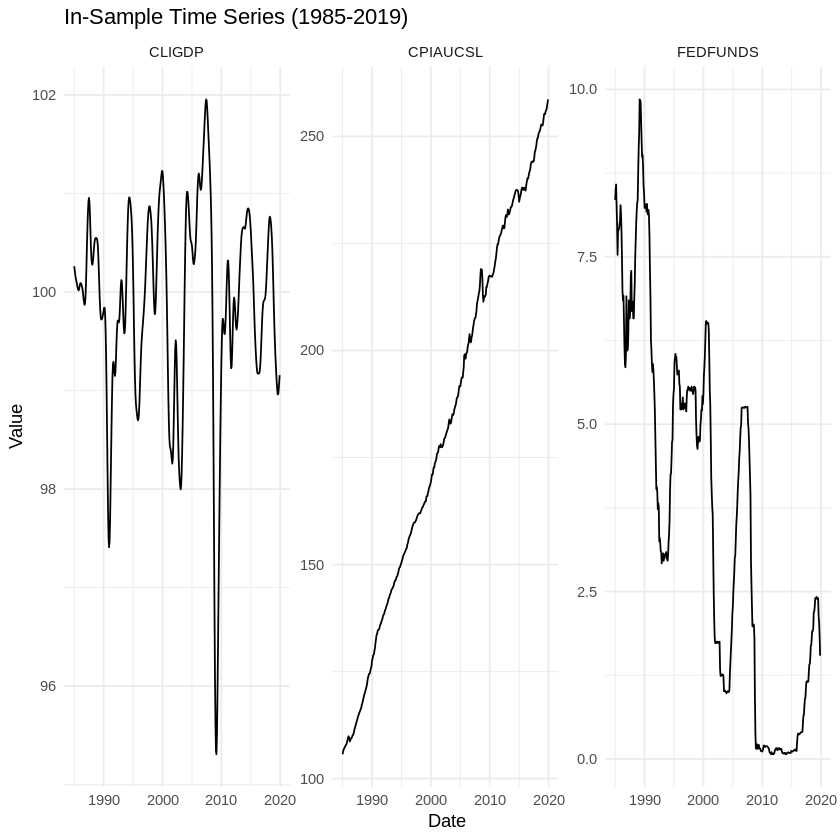

Series: fedfunds_ts 
ARIMA(5,0,3) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ar5     ma1     ma2      ma3    mean
      1.2172  -0.2531  0.9505  -1.2026  0.2844  0.2135  0.1970  -0.7376  3.8993
s.e.  0.1072   0.1047  0.0647   0.1007  0.0775  0.0923  0.0941   0.0806  1.3559

sigma^2 = 0.02583:  log likelihood = 172.08
AIC=-324.15   AICc=-323.61   BIC=-283.8

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.005502185 0.1589756 0.1001244 -2.603118 7.316122 0.1001441
                     ACF1
Training set 0.0001025428

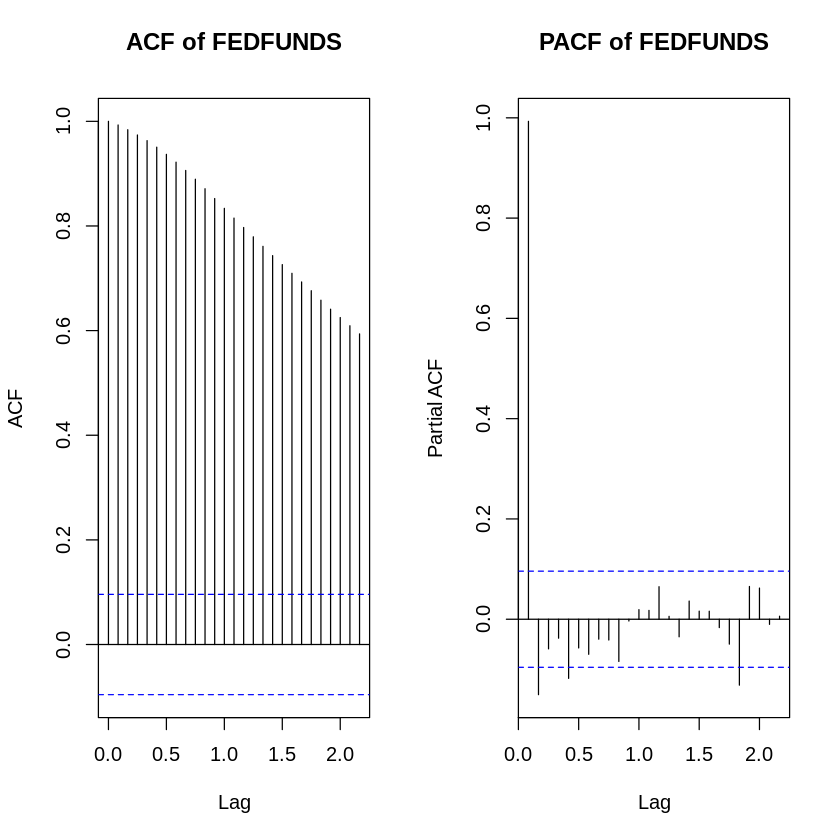

  Model      RMSE
1    AR 0.1493011
2 ARIMA 0.1465815
3   VAR 0.4106401


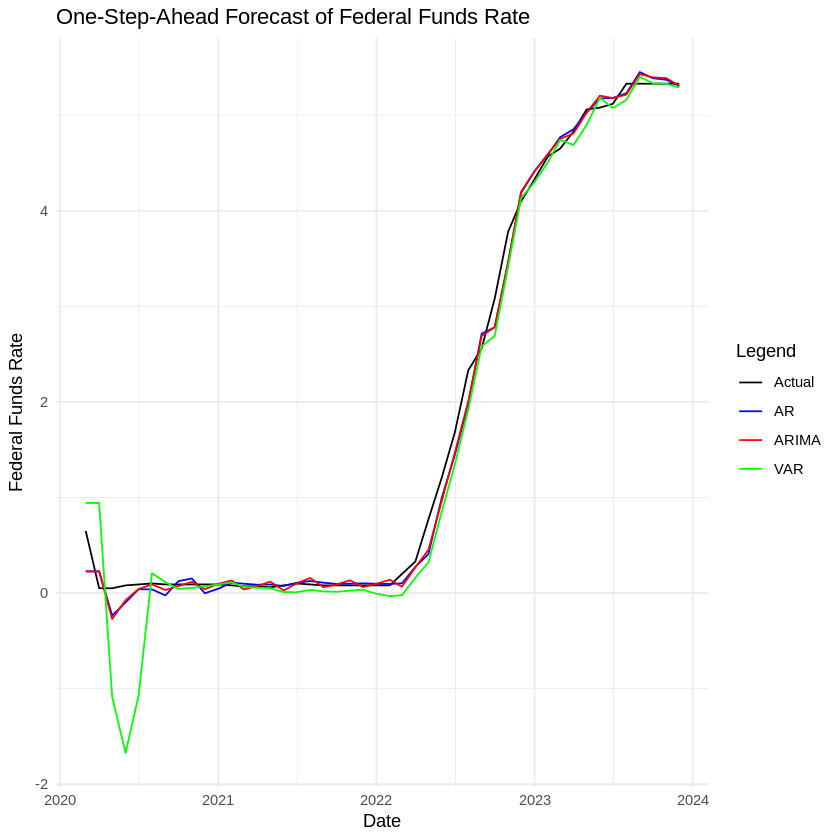

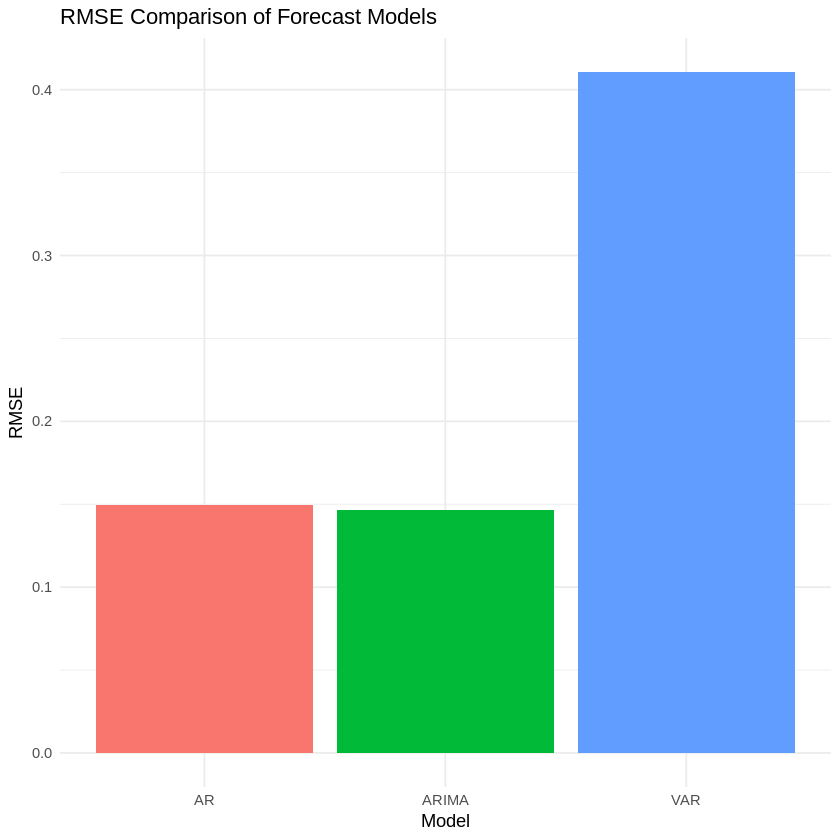

In [ ]:
# Conditionally install required packages
if (!require(forecast)) install.packages("forecast")
if (!require(vars)) install.packages("vars")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(tseries)) install.packages("tseries")
if (!require(ggplot2)) install.packages("ggplot2")

# Load required libraries
library(forecast)
library(vars)
library(tidyverse)
library(tseries)
library(ggplot2)

# Load the datasets
cli_gdp_proxy <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=USALOLITONOSTSAM", stringsAsFactors = FALSE)
fedfunds <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS", stringsAsFactors = FALSE)
cpi <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL", stringsAsFactors = FALSE)

# Convert DATE columns to Date type and align data
cli_gdp_proxy$DATE <- as.Date(cli_gdp_proxy$DATE)
fedfunds$DATE <- as.Date(fedfunds$DATE)
cpi$DATE <- as.Date(cpi$DATE)

# Merge all datasets on DATE
data <- reduce(
  list(cli_gdp_proxy, fedfunds, cpi),
  full_join,
  by = "DATE"
)
colnames(data) <- c("DATE", "CLIGDP", "FEDFUNDS", "CPIAUCSL")

# Filter training data (1985-01 to 2019-12)
train_data <- data %>%
  filter(DATE >= as.Date("1985-01-01") & DATE <= as.Date("2019-12-01"))

# Filter test data (2020-01 to 2023-12)
test_data <- data %>%
  filter(DATE >= as.Date("2020-01-01") & DATE <= as.Date("2023-12-01"))

# Prepare time series objects
cli_gdp_ts <- ts(train_data$CLIGDP, start = c(1985, 1), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 1), frequency = 12)
cpi_ts <- ts(train_data$CPIAUCSL, start = c(1985, 1), frequency = 12)

# Plot the 3 time series in separate diagrams
plot_data <- train_data %>%
  dplyr::select(DATE, CLIGDP, FEDFUNDS, CPIAUCSL) %>%
  pivot_longer(
    cols = -DATE,
    names_to = "Variable",
    values_to = "Value"
  )

ggplot(plot_data, aes(x = DATE, y = Value)) +
  geom_line() +
  facet_wrap(~ Variable, scales = "free_y") + # Separate panels for each variable
  labs(
    title = "In-Sample Time Series (1985-2019)",
    x = "Date",
    y = "Value"
  ) +
  theme_minimal()

# Check for non-stationarity using the Augmented Dickey-Fuller (ADF) test
check_stationarity <- function(ts_data, variable_name) {
  adf_result <- adf.test(ts_data, alternative = "stationary")
  cat("\n", variable_name, ":\n")
  print(adf_result)
}

cat("Checking stationarity of in-sample data:\n")
check_stationarity(cli_gdp_ts, "CLIGDP")
check_stationarity(fedfunds_ts, "FEDFUNDS")
check_stationarity(cpi_ts, "CPIAUCSL")

# Take first differences for CPI
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL))
  ) %>%
  na.omit()

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL))
  ) %>%
  na.omit()

cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)

cat("Checking stationarity of differenced variable:\n")
check_stationarity(cpi_diff_ts, "Differenced CPI")

# Remove the first observation from differenced variables to match lengths
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL))
  ) %>%
  slice(-1)  # Remove the first row to drop NAs from differencing

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL))
  ) %>%
  slice(-1)  # Remove the first row to drop NAs from differencing

# Create time series objects with adjusted data
cli_gdp_ts <- ts(train_data$CLIGDP, start = c(1985, 2), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 2), frequency = 12)
cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)

# Define a function to calculate the AIC or BIC for different lag orders
select_ar_order <- function(ts_data, max_lag = 10, criterion = "AIC") {
  results <- data.frame(Lag = integer(), Criterion = numeric())

  for (p in 1:max_lag) {
    model <- Arima(ts_data, order = c(p, 0, 0))
    if (criterion == "AIC") {
      crit_value <- AIC(model)
    } else if (criterion == "BIC") {
      crit_value <- BIC(model)
    } else {
      stop("Invalid criterion specified. Use 'AIC' or 'BIC'.")
    }
    results <- rbind(results, data.frame(Lag = p, Criterion = crit_value))
  }

  return(results[which.min(results$Criterion), ])
}

# Example usage
max_lag_order <- 14  # Specify the maximum lag to test
criterion_to_use <- "AIC"  # Choose "AIC" or "BIC"

# Find the best lag order for the FEDFUNDS time series
best_order <- select_ar_order(fedfunds_ts, max_lag = max_lag_order, criterion = criterion_to_use)
print(paste("Best lag order based on", criterion_to_use, ":", best_order$Lag))

# AR Model for FEDFUNDS
ar_model <- Arima(fedfunds_ts, order = c(10, 0, 0))  # AR(10)
ar_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(ar_forecast)) {
  ar_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]), order = c(10, 0, 0))
  ar_forecast[i] <- forecast(ar_model, h = 1)$mean
}

### ARIMA Model Selection
par(mfrow = c(1, 2))
acf(fedfunds_ts, main = "ACF of FEDFUNDS")
pacf(fedfunds_ts, main = "PACF of FEDFUNDS")

# Test ARIMA models with varying p and q
best_model <- NULL
best_aic <- Inf  # Start with a high AIC value
max_order <- 5   # Maximum p and q to test

for (p in 0:max_order) {
  for (q in 0:max_order) {
    tryCatch({
      model <- Arima(fedfunds_ts, order = c(p, 0, q))
      aic <- AIC(model)
      if (aic < best_aic) {
        best_aic <- aic
        best_model <- model
      }
    }, error = function(e) {})
  }
}

# Best model summary
summary(best_model)

# ARIMA (p, d, q)
arima_p <- 5  # AR order
arima_d <- 0  # Differencing order
arima_q <- 3  # MA order

arima_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(arima_forecast)) {
  arima_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]),
                       order = c(arima_p, arima_d, arima_q))
  arima_forecast[i] <- forecast(arima_model, h = 1)$mean
}

### VAR Model Forecast
var_data <- cbind(
  cli_gdp_ts,
  fedfunds_ts,
  cpi_diff_ts
)

var_forecast <- matrix(NA, nrow = nrow(test_data), ncol = 3)  # Initialize forecast matrix
colnames(var_forecast) <- c("CLIGDP", "FEDFUNDS", "CPIAUCSL_diff")

for (i in 1:nrow(var_forecast)) {
  updated_test <- na.omit(test_data[1:(i - 1), c("CLIGDP", "FEDFUNDS", "CPIAUCSL_diff")])
  updated_data <- rbind(var_data, as.matrix(updated_test))
  var_model <- VAR(updated_data, p = 4)
  forecast_result <- predict(var_model, n.ahead = 1)
  var_forecast[i, ] <- sapply(forecast_result$fcst, function(x) x[1, 1])
}

# Combine forecasts and actual values for visualization
forecast_results_unemployment <- data.frame(
  DATE = test_data$DATE,
  Actual_FEDFUNDS = test_data$FEDFUNDS,
  AR = ar_forecast,
  ARIMA = arima_forecast,
  VAR = var_forecast[, "FEDFUNDS"]
)

# Plot forecasts with actual values
ggplot(data = forecast_results_unemployment, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = AR, color = "AR")) +
  geom_line(aes(y = ARIMA, color = "ARIMA")) +
  geom_line(aes(y = VAR, color = "VAR")) +
  labs(title = "One-Step-Ahead Forecast of Federal Funds Rate",
       y = "Federal Funds Rate",
       x = "Date") +
  scale_color_manual(
    values = c("Actual" = "black", "AR" = "blue", "ARIMA" = "red", "VAR" = "green"),
    name = "Legend"
  ) +
  theme_minimal()

# Calculate RMSE for each forecast
ar_rmse_unemployment <- sqrt(mean((forecast_results_unemployment$Actual_FEDFUNDS - forecast_results_unemployment$AR)^2, na.rm = TRUE))
arima_rmse_unemployment <- sqrt(mean((forecast_results_unemployment$Actual_FEDFUNDS - forecast_results_unemployment$ARIMA)^2, na.rm = TRUE))
var_rmse_unemployment <- sqrt(mean((forecast_results_unemployment$Actual_FEDFUNDS - forecast_results_unemployment$VAR)^2, na.rm = TRUE))

# Display RMSE results
rmse_results_unemployment <- data.frame(
  Model = c("AR", "ARIMA", "VAR"),
  RMSE = c(ar_rmse_unemployment, arima_rmse_unemployment, var_rmse_unemployment)
)

print(rmse_results_unemployment)

# Visualization of RMSE results
ggplot(data = rmse_results_unemployment, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "RMSE Comparison of Forecast Models",
       y = "RMSE",
       x = "Model") +
  theme_minimal() +
  theme(legend.position = "none")



# TS Models with BBK GDP Proxy

Checking stationarity of in-sample data:


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 BBKGDP :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -5.2227, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


 FEDFUNDS :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -3.4889, Lag order = 7, p-value = 0.04369
alternative hypothesis: stationary


 UNRATE :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -2.7096, Lag order = 7, p-value = 0.2776
alternative hypothesis: stationary


 CPIAUCSL :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -2.5241, Lag order = 7, p-value = 0.356
alternative hypothesis: stationary

Checking stationarity of differenced variables:


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 Differenced CPI :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -7.7952, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


 Differenced UNRATE :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -3.8976, Lag order = 7, p-value = 0.01428
alternative hypothesis: stationary

[1] "Best lag order based on AIC : 10"


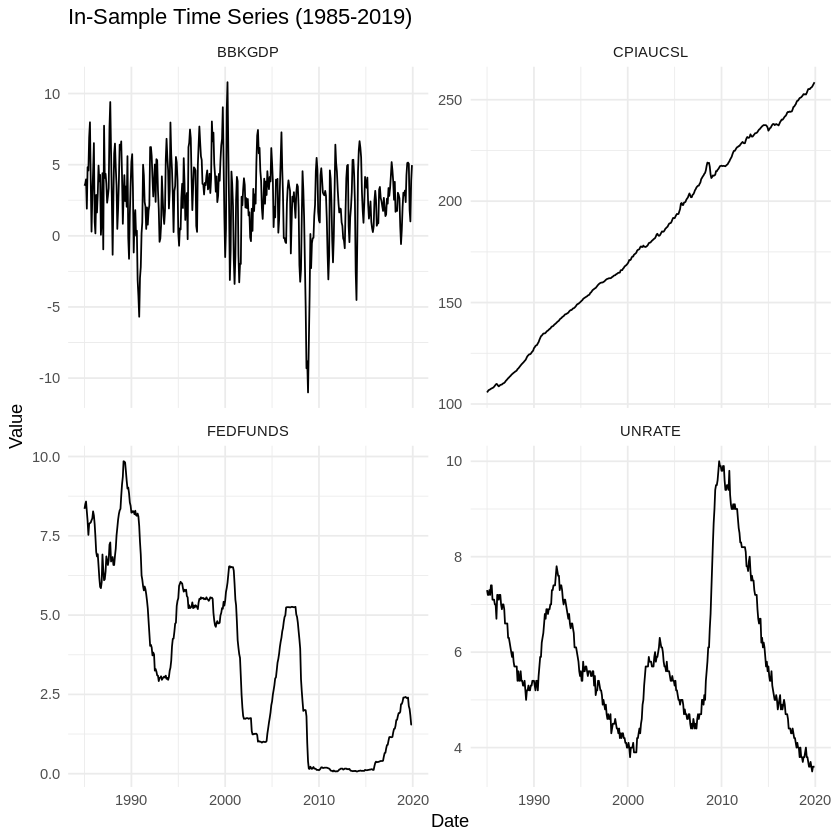

Series: fedfunds_ts 
ARIMA(5,0,3) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ar5     ma1     ma2      ma3    mean
      1.2172  -0.2531  0.9505  -1.2026  0.2844  0.2135  0.1970  -0.7376  3.8993
s.e.  0.1072   0.1047  0.0647   0.1007  0.0775  0.0923  0.0941   0.0806  1.3559

sigma^2 = 0.02583:  log likelihood = 172.08
AIC=-324.15   AICc=-323.61   BIC=-283.8

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.005502185 0.1589756 0.1001244 -2.603118 7.316122 0.1001441
                     ACF1
Training set 0.0001025428

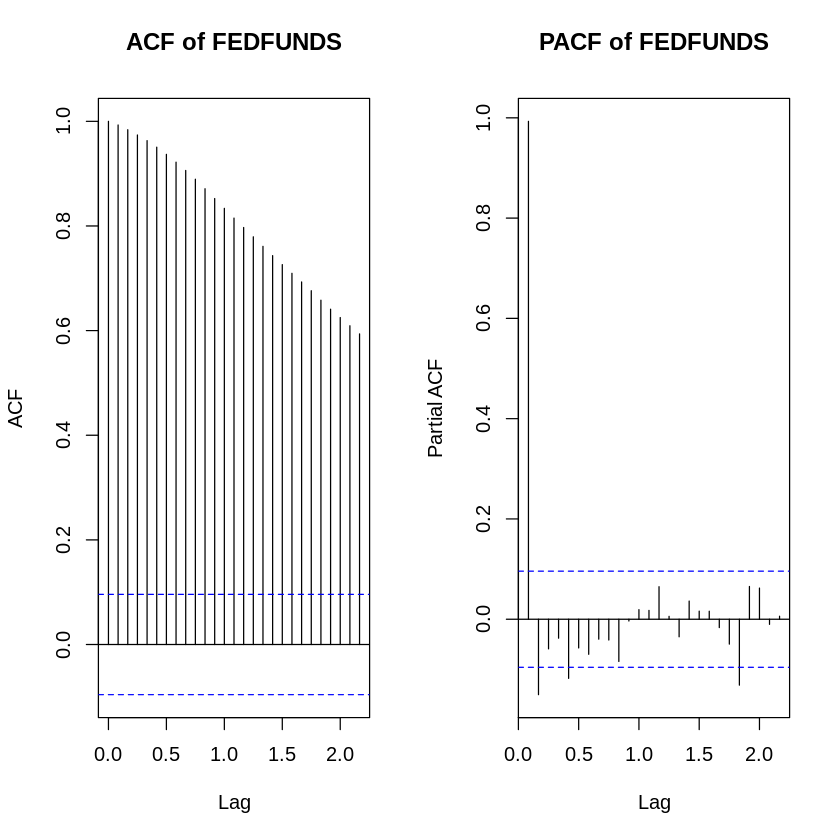

  Model      RMSE
1    AR 0.1493011
2 ARIMA 0.1465815
3   VAR 0.3706975


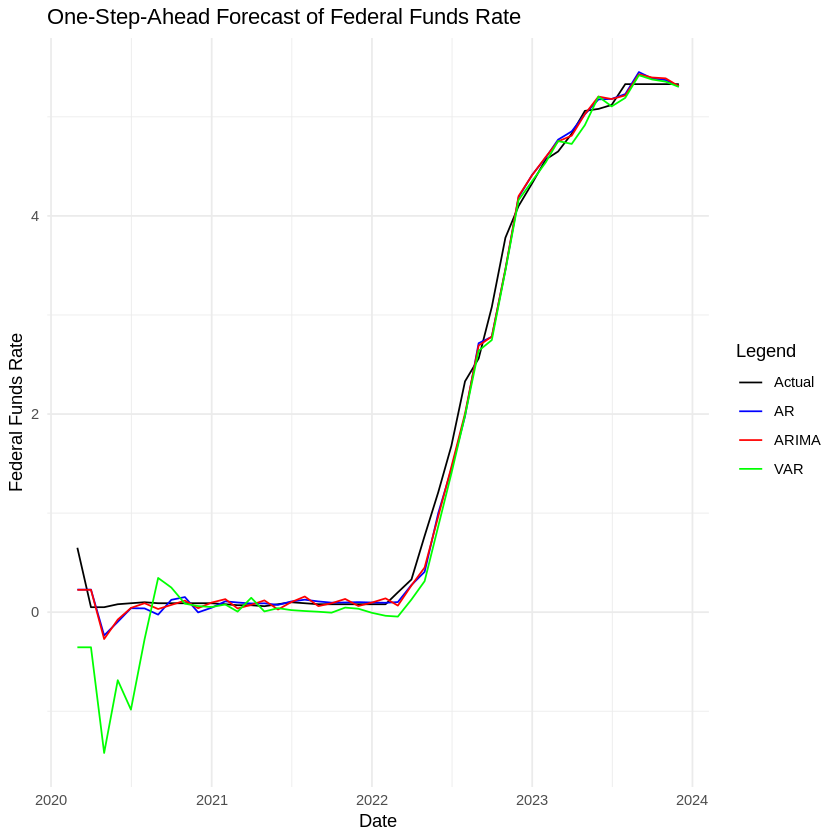

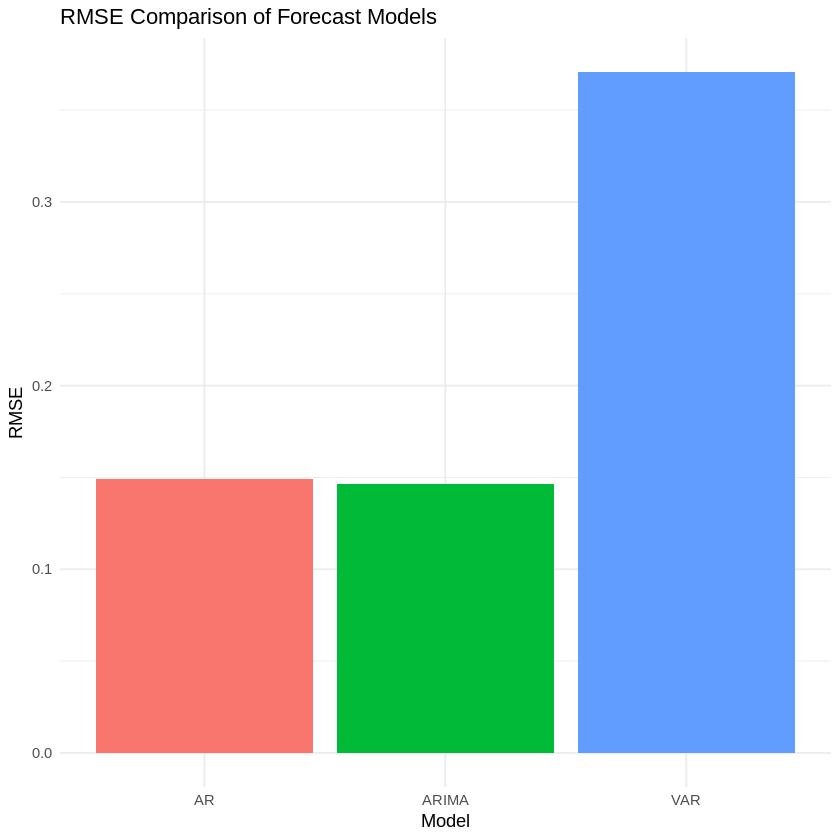

In [ ]:
# Load required libraries
library(forecast)
library(vars)
library(tidyverse)
library(tseries)
library(ggplot2)

# Load the datasets
bbk_gdp <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=BBKMGDP", stringsAsFactors = FALSE)
fedfunds <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS", stringsAsFactors = FALSE)
unrate <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE", stringsAsFactors = FALSE)
cpi <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL", stringsAsFactors = FALSE)

# Convert DATE columns to Date type and align data
bbk_gdp$DATE <- as.Date(bbk_gdp$DATE)
fedfunds$DATE <- as.Date(fedfunds$DATE)
unrate$DATE <- as.Date(unrate$DATE)
cpi$DATE <- as.Date(cpi$DATE)

# Merge all datasets on DATE
data <- reduce(
  list(bbk_gdp, fedfunds, unrate, cpi),
  full_join,
  by = "DATE"
)
colnames(data) <- c("DATE", "BBKGDP", "FEDFUNDS", "UNRATE", "CPIAUCSL")

# Filter training data (1985-01 to 2019-12)
train_data <- data %>%
  filter(DATE >= as.Date("1985-01-01") & DATE <= as.Date("2019-12-01"))

# Filter test data (2020-01 to 2023-12)
test_data <- data %>%
  filter(DATE >= as.Date("2020-01-01") & DATE <= as.Date("2023-12-01"))

# Prepare time series objects
bbk_gdp_ts <- ts(train_data$BBKGDP, start = c(1985, 1), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 1), frequency = 12)
unrate_ts <- ts(train_data$UNRATE, start = c(1985, 1), frequency = 12)
cpi_ts <- ts(train_data$CPIAUCSL, start = c(1985, 1), frequency = 12)

# Plot the 4 time series in separate diagrams
plot_data <- train_data %>%
  dplyr::select(DATE, BBKGDP, FEDFUNDS, UNRATE, CPIAUCSL) %>%
  pivot_longer(
    cols = -DATE,
    names_to = "Variable",
    values_to = "Value"
  )

ggplot(plot_data, aes(x = DATE, y = Value)) +
  geom_line() +
  facet_wrap(~ Variable, scales = "free_y") + # Separate panels for each variable
  labs(
    title = "In-Sample Time Series (1985-2019)",
    x = "Date",
    y = "Value"
  ) +
  theme_minimal()

# Check for non-stationarity using the Augmented Dickey-Fuller (ADF) test
check_stationarity <- function(ts_data, variable_name) {
  adf_result <- adf.test(ts_data, alternative = "stationary")
  cat("\n", variable_name, ":\n")
  print(adf_result)
}

cat("Checking stationarity of in-sample data:\n")
check_stationarity(bbk_gdp_ts, "BBKGDP")
check_stationarity(fedfunds_ts, "FEDFUNDS")
check_stationarity(unrate_ts, "UNRATE")
check_stationarity(cpi_ts, "CPIAUCSL")

# Take first differences for CPI and UNRATE
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)
unrate_diff_ts <- ts(train_data$UNRATE_diff, start = c(1985, 2), frequency = 12)

cat("Checking stationarity of differenced variables:\n")
check_stationarity(cpi_diff_ts, "Differenced CPI")
check_stationarity(unrate_diff_ts, "Differenced UNRATE")

# Remove the first observation from differenced variables to match lengths
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  slice(-1)  # Remove the first row to drop NAs from differencing

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  slice(-1)  # Remove the first row to drop NAs from differencing

# Create time series objects with adjusted data
bbk_gdp_ts <- ts(train_data$BBKGDP, start = c(1985, 2), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 2), frequency = 12)
cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)
unrate_diff_ts <- ts(train_data$UNRATE_diff, start = c(1985, 2), frequency = 12)

# Define a function to calculate the AIC or BIC for different lag orders
select_ar_order <- function(ts_data, max_lag = 10, criterion = "AIC") {
  results <- data.frame(Lag = integer(), Criterion = numeric())

  for (p in 1:max_lag) {
    model <- Arima(ts_data, order = c(p, 0, 0))
    if (criterion == "AIC") {
      crit_value <- AIC(model)
    } else if (criterion == "BIC") {
      crit_value <- BIC(model)
    } else {
      stop("Invalid criterion specified. Use 'AIC' or 'BIC'.")
    }
    results <- rbind(results, data.frame(Lag = p, Criterion = crit_value))
  }

  return(results[which.min(results$Criterion), ])
}

# Example usage
max_lag_order <- 14  # Specify the maximum lag to test
criterion_to_use <- "AIC"  # Choose "AIC" or "BIC"

# Find the best lag order for the FEDFUNDS time series
best_order <- select_ar_order(fedfunds_ts, max_lag = max_lag_order, criterion = criterion_to_use)
print(paste("Best lag order based on", criterion_to_use, ":", best_order$Lag))

# AR Model for FEDFUNDS
ar_model <- Arima(fedfunds_ts, order = c(10, 0, 0))  # AR(10)
ar_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(ar_forecast)) {
  ar_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]), order = c(10, 0, 0))
  ar_forecast[i] <- forecast(ar_model, h = 1)$mean
}

### ARIMA Model Selection
par(mfrow = c(1, 2))
acf(fedfunds_ts, main = "ACF of FEDFUNDS")
pacf(fedfunds_ts, main = "PACF of FEDFUNDS")

# Test ARIMA models with varying p and q
best_model <- NULL
best_aic <- Inf  # Start with a high AIC value
max_order <- 5   # Maximum p and q to test

for (p in 0:max_order) {
  for (q in 0:max_order) {
    tryCatch({
      model <- Arima(fedfunds_ts, order = c(p, 0, q))
      aic <- AIC(model)
      if (aic < best_aic) {
        best_aic <- aic
        best_model <- model
      }
    }, error = function(e) {})
  }
}

# Best model summary
summary(best_model)

# ARIMA (p, d, q)
arima_p <- 5  # AR order
arima_d <- 0  # Differencing order
arima_q <- 3  # MA order

arima_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(arima_forecast)) {
  arima_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]),
                       order = c(arima_p, arima_d, arima_q))
  arima_forecast[i] <- forecast(arima_model, h = 1)$mean
}

### VAR Model Forecast
var_data <- cbind(
  bbk_gdp_ts,
  fedfunds_ts,
  unrate_diff_ts,
  cpi_diff_ts
)

var_forecast <- matrix(NA, nrow = nrow(test_data), ncol = 4)  # Initialize forecast matrix
colnames(var_forecast) <- c("BBKGDP", "FEDFUNDS", "UNRATE_diff", "CPIAUCSL_diff")

for (i in 1:nrow(var_forecast)) {
  updated_test <- na.omit(test_data[1:(i - 1), c("BBKGDP", "FEDFUNDS", "UNRATE_diff", "CPIAUCSL_diff")])
  updated_data <- rbind(var_data, as.matrix(updated_test))
  var_model <- VAR(updated_data, p = 4)
  forecast_result <- predict(var_model, n.ahead = 1)
  var_forecast[i, ] <- sapply(forecast_result$fcst, function(x) x[1, 1])
}

# Combine forecasts and actual values for visualization
forecast_results_bbk <- data.frame(
  DATE = test_data$DATE,
  Actual_FEDFUNDS = test_data$FEDFUNDS,
  AR = ar_forecast,
  ARIMA = arima_forecast,
  VAR = var_forecast[, "FEDFUNDS"]
)

# Plot forecasts with actual values
ggplot(data = forecast_results_bbk, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = AR, color = "AR")) +
  geom_line(aes(y = ARIMA, color = "ARIMA")) +
  geom_line(aes(y = VAR, color = "VAR")) +
  labs(title = "One-Step-Ahead Forecast of Federal Funds Rate",
       y = "Federal Funds Rate",
       x = "Date") +
  scale_color_manual(
    values = c("Actual" = "black", "AR" = "blue", "ARIMA" = "red", "VAR" = "green"),
    name = "Legend"
  ) +
  theme_minimal()

# Calculate RMSE for each forecast
ar_rmse_bbk <- sqrt(mean((forecast_results_bbk$Actual_FEDFUNDS - forecast_results_bbk$AR)^2, na.rm = TRUE))
arima_rmse_bbk <- sqrt(mean((forecast_results_bbk$Actual_FEDFUNDS - forecast_results_bbk$ARIMA)^2, na.rm = TRUE))
var_rmse_bbk <- sqrt(mean((forecast_results_bbk$Actual_FEDFUNDS - forecast_results_bbk$VAR)^2, na.rm = TRUE))

# Display RMSE results
rmse_results_bbk <- data.frame(
  Model = c("AR", "ARIMA", "VAR"),
  RMSE = c(ar_rmse_bbk, arima_rmse_bbk, var_rmse_bbk)
)

print(rmse_results_bbk)

# Visualization of RMSE results
ggplot(data = rmse_results_bbk, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "RMSE Comparison of Forecast Models",
       y = "RMSE",
       x = "Model") +
  theme_minimal() +
  theme(legend.position = "none")



#TS Models with BBK GDP Proxy and Without Unemployment

Checking stationarity of in-sample data:


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 BBKGDP :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -5.2227, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


 FEDFUNDS :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -3.4889, Lag order = 7, p-value = 0.04369
alternative hypothesis: stationary


 CPIAUCSL :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -2.5241, Lag order = 7, p-value = 0.356
alternative hypothesis: stationary

Checking stationarity of differenced variable:


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 Differenced CPI :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -7.7952, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary

[1] "Best lag order based on AIC : 10"


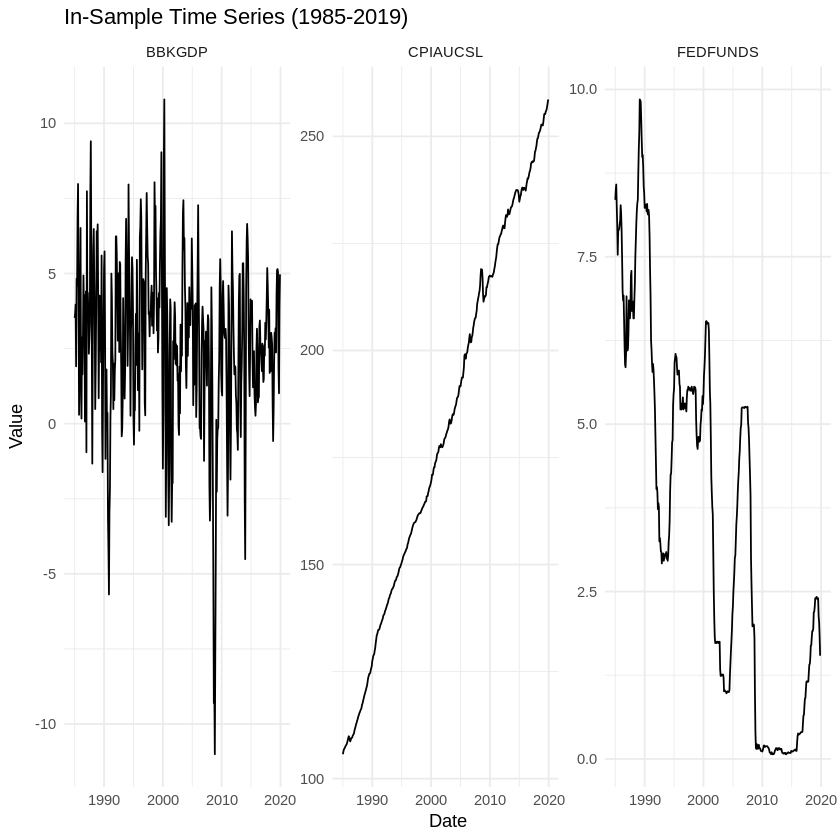

Series: fedfunds_ts 
ARIMA(5,0,3) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ar4     ar5     ma1     ma2      ma3    mean
      1.2172  -0.2531  0.9505  -1.2026  0.2844  0.2135  0.1970  -0.7376  3.8993
s.e.  0.1072   0.1047  0.0647   0.1007  0.0775  0.0923  0.0941   0.0806  1.3559

sigma^2 = 0.02583:  log likelihood = 172.08
AIC=-324.15   AICc=-323.61   BIC=-283.8

Training set error measures:
                       ME      RMSE       MAE       MPE     MAPE      MASE
Training set -0.005502185 0.1589756 0.1001244 -2.603118 7.316122 0.1001441
                     ACF1
Training set 0.0001025428

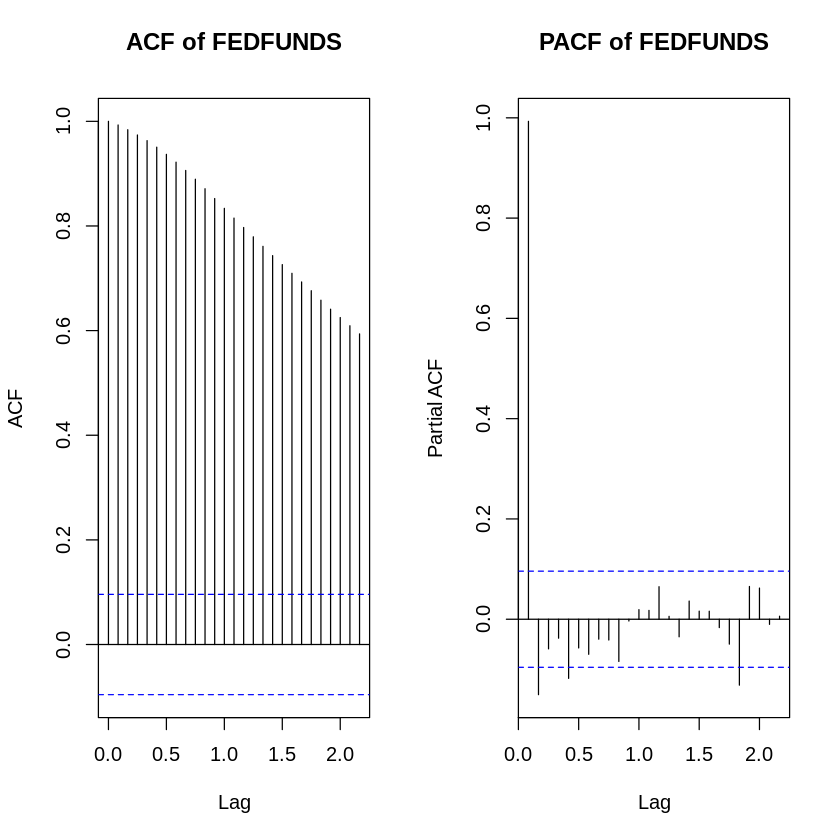

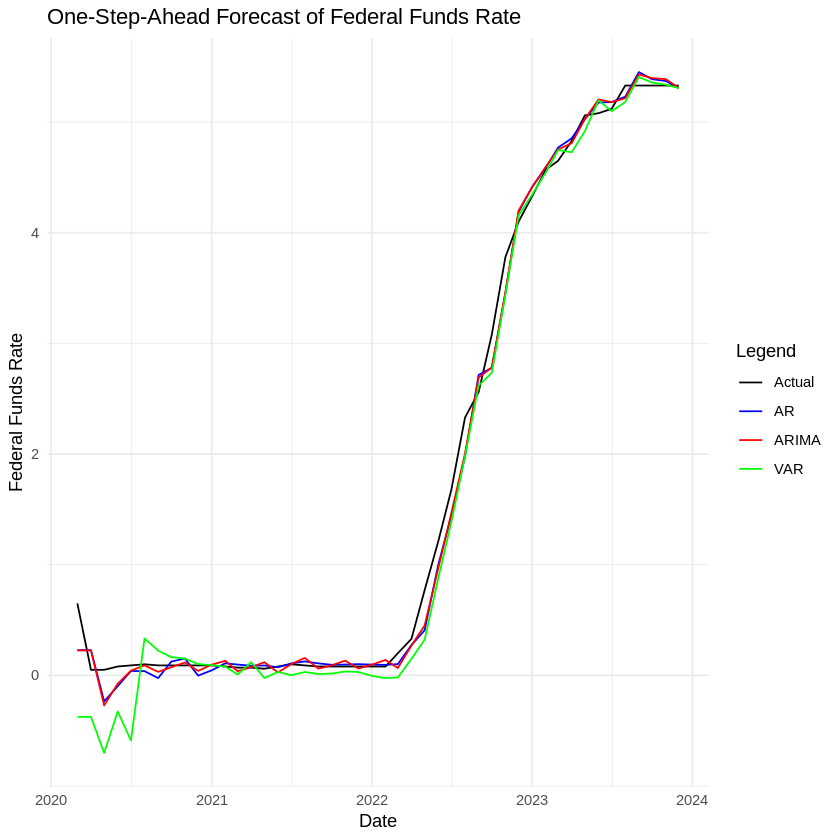

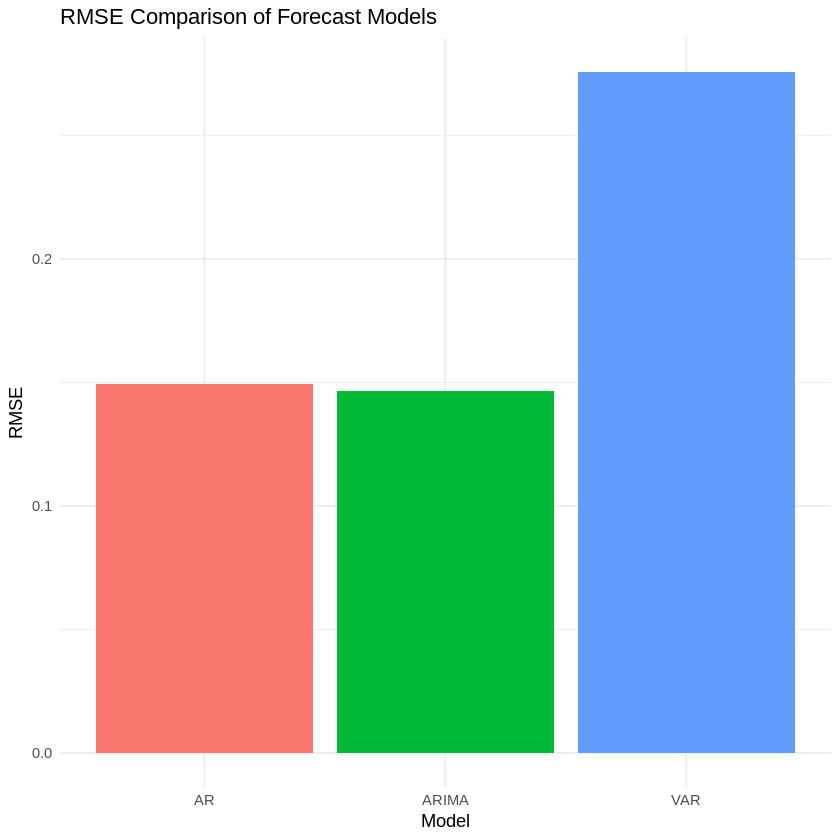

In [ ]:
# Load required libraries
library(forecast)
library(vars)
library(tidyverse)
library(tseries)
library(ggplot2)

# Load the datasets
bbk_gdp <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=BBKMGDP", stringsAsFactors = FALSE)
fedfunds <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS", stringsAsFactors = FALSE)
cpi <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL", stringsAsFactors = FALSE)

# Convert DATE columns to Date type and align data
bbk_gdp$DATE <- as.Date(bbk_gdp$DATE)
fedfunds$DATE <- as.Date(fedfunds$DATE)
cpi$DATE <- as.Date(cpi$DATE)

# Merge all datasets on DATE
data <- reduce(
  list(bbk_gdp, fedfunds, cpi),
  full_join,
  by = "DATE"
)
colnames(data) <- c("DATE", "BBKGDP", "FEDFUNDS", "CPIAUCSL")

# Filter training data (1985-01 to 2019-12)
train_data <- data %>%
  filter(DATE >= as.Date("1985-01-01") & DATE <= as.Date("2019-12-01"))

# Filter test data (2020-01 to 2023-12)
test_data <- data %>%
  filter(DATE >= as.Date("2020-01-01") & DATE <= as.Date("2023-12-01"))

# Prepare time series objects
bbk_gdp_ts <- ts(train_data$BBKGDP, start = c(1985, 1), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 1), frequency = 12)
cpi_ts <- ts(train_data$CPIAUCSL, start = c(1985, 1), frequency = 12)

# Plot the 3 time series in separate diagrams
plot_data <- train_data %>%
  dplyr::select(DATE, BBKGDP, FEDFUNDS, CPIAUCSL) %>%
  pivot_longer(
    cols = -DATE,
    names_to = "Variable",
    values_to = "Value"
  )

ggplot(plot_data, aes(x = DATE, y = Value)) +
  geom_line() +
  facet_wrap(~ Variable, scales = "free_y") + # Separate panels for each variable
  labs(
    title = "In-Sample Time Series (1985-2019)",
    x = "Date",
    y = "Value"
  ) +
  theme_minimal()

# Check for non-stationarity using the Augmented Dickey-Fuller (ADF) test
check_stationarity <- function(ts_data, variable_name) {
  adf_result <- adf.test(ts_data, alternative = "stationary")
  cat("\n", variable_name, ":\n")
  print(adf_result)
}

cat("Checking stationarity of in-sample data:\n")
check_stationarity(bbk_gdp_ts, "BBKGDP")
check_stationarity(fedfunds_ts, "FEDFUNDS")
check_stationarity(cpi_ts, "CPIAUCSL")

# Take first differences for CPI
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL))
  ) %>%
  na.omit()

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL))
  ) %>%
  na.omit()

cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)

cat("Checking stationarity of differenced variable:\n")
check_stationarity(cpi_diff_ts, "Differenced CPI")

# Remove the first observation from differenced variables to match lengths
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL))
  ) %>%
  slice(-1)  # Remove the first row to drop NAs from differencing

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL))
  ) %>%
  slice(-1)  # Remove the first row to drop NAs from differencing

# Create time series objects with adjusted data
bbk_gdp_ts <- ts(train_data$BBKGDP, start = c(1985, 2), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 2), frequency = 12)
cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)

# Define a function to calculate the AIC or BIC for different lag orders
select_ar_order <- function(ts_data, max_lag = 10, criterion = "AIC") {
  results <- data.frame(Lag = integer(), Criterion = numeric())

  for (p in 1:max_lag) {
    model <- Arima(ts_data, order = c(p, 0, 0))
    if (criterion == "AIC") {
      crit_value <- AIC(model)
    } else if (criterion == "BIC") {
      crit_value <- BIC(model)
    } else {
      stop("Invalid criterion specified. Use 'AIC' or 'BIC'.")
    }
    results <- rbind(results, data.frame(Lag = p, Criterion = crit_value))
  }

  return(results[which.min(results$Criterion), ])
}

# Example usage
max_lag_order <- 14  # Specify the maximum lag to test
criterion_to_use <- "AIC"  # Choose "AIC" or "BIC"

# Find the best lag order for the FEDFUNDS time series
best_order <- select_ar_order(fedfunds_ts, max_lag = max_lag_order, criterion = criterion_to_use)
print(paste("Best lag order based on", criterion_to_use, ":", best_order$Lag))

# AR Model for FEDFUNDS
ar_model <- Arima(fedfunds_ts, order = c(10, 0, 0))  # AR(10)
ar_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(ar_forecast)) {
  ar_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]), order = c(10, 0, 0))
  ar_forecast[i] <- forecast(ar_model, h = 1)$mean
}

### ARIMA Model Selection
par(mfrow = c(1, 2))
acf(fedfunds_ts, main = "ACF of FEDFUNDS")
pacf(fedfunds_ts, main = "PACF of FEDFUNDS")

# Test ARIMA models with varying p and q
best_model <- NULL
best_aic <- Inf  # Start with a high AIC value
max_order <- 5   # Maximum p and q to test

for (p in 0:max_order) {
  for (q in 0:max_order) {
    tryCatch({
      model <- Arima(fedfunds_ts, order = c(p, 0, q))
      aic <- AIC(model)
      if (aic < best_aic) {
        best_aic <- aic
        best_model <- model
      }
    }, error = function(e) {})
  }
}

# Best model summary
summary(best_model)

# ARIMA (p, d, q)
arima_p <- 5  # AR order
arima_d <- 0  # Differencing order
arima_q <- 3  # MA order

arima_forecast <- numeric(nrow(test_data))  # Initialize forecast array
for (i in 1:length(arima_forecast)) {
  arima_model <- Arima(c(fedfunds_ts, test_data$FEDFUNDS[1:(i - 1)]),
                       order = c(arima_p, arima_d, arima_q))
  arima_forecast[i] <- forecast(arima_model, h = 1)$mean
}

### VAR Model Forecast
var_data <- cbind(
  bbk_gdp_ts,
  fedfunds_ts,
  cpi_diff_ts
)

var_forecast <- matrix(NA, nrow = nrow(test_data), ncol = 3)  # Initialize forecast matrix
colnames(var_forecast) <- c("BBKGDP", "FEDFUNDS", "CPIAUCSL_diff")

for (i in 1:nrow(var_forecast)) {
  updated_test <- na.omit(test_data[1:(i - 1), c("BBKGDP", "FEDFUNDS", "CPIAUCSL_diff")])
  updated_data <- rbind(var_data, as.matrix(updated_test))
  var_model <- VAR(updated_data, p = 4)
  forecast_result <- predict(var_model, n.ahead = 1)
  var_forecast[i, ] <- sapply(forecast_result$fcst, function(x) x[1, 1])
}

forecast_results <- data.frame(
  DATE = test_data$DATE,
  Actual_FEDFUNDS = test_data$FEDFUNDS,
  AR = ar_forecast,
  ARIMA = arima_forecast,
  VAR = var_forecast[, "FEDFUNDS"]
)

ggplot(data = forecast_results, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = AR, color = "AR")) +
  geom_line(aes(y = ARIMA, color = "ARIMA")) +
  geom_line(aes(y = VAR, color = "VAR")) +
  labs(title = "One-Step-Ahead Forecast of Federal Funds Rate",
       y = "Federal Funds Rate",
       x = "Date") +
  scale_color_manual(
    values = c("Actual" = "black", "AR" = "blue", "ARIMA" = "red", "VAR" = "green"),
    name = "Legend"
  ) +
  theme_minimal()

# Calculate RMSE for each forecast
ar_rmse <- sqrt(mean((forecast_results$Actual_FEDFUNDS - forecast_results$AR)^2, na.rm = TRUE))
arima_rmse <- sqrt(mean((forecast_results$Actual_FEDFUNDS - forecast_results$ARIMA)^2, na.rm = TRUE))
var_rmse <- sqrt(mean((forecast_results$Actual_FEDFUNDS - forecast_results$VAR)^2, na.rm = TRUE))

rmse_results <- data.frame(
  Model = c("AR", "ARIMA", "VAR"),
  RMSE = c(ar_rmse, arima_rmse, var_rmse)
)

ggplot(data = rmse_results, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(title = "RMSE Comparison of Forecast Models",
       y = "RMSE",
       x = "Model") +
  theme_minimal() +
  theme(legend.position = "none")


# RF Models (Baseline)

Loading required package: randomForest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘randomForest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine




  lags bootstrap_size mtry      RMSE
1    5           0.85    3 0.1525187
Final RMSE: 0.694492 


Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘coin’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernl

Best Random Forest Model Parameters:
   mtry
16   16


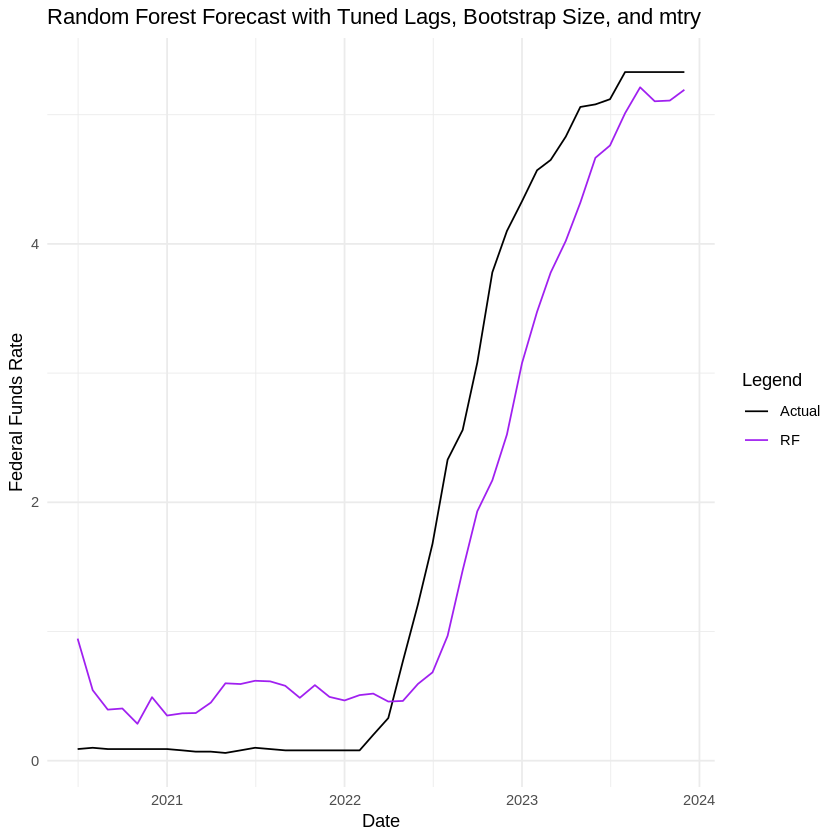

Test Set RMSE: 0.3038598 


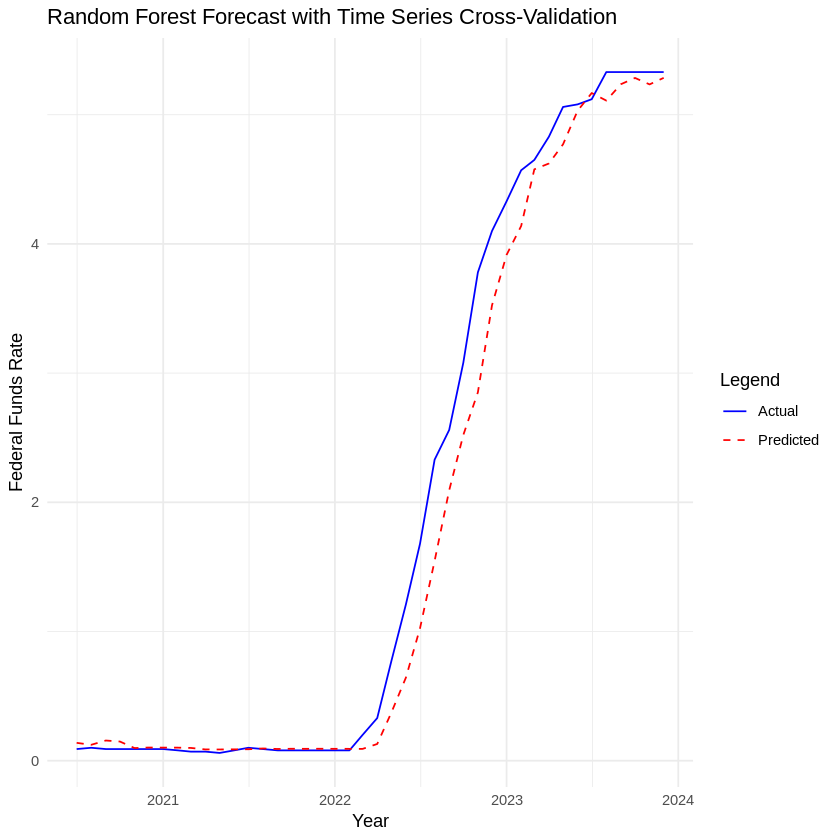

In [ ]:
###############################################
# Install and Load Required Libraries
###############################################
if (!require(randomForest)) install.packages("randomForest")
if (!require(forecast)) install.packages("forecast")
if (!require(vars)) install.packages("vars")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(tseries)) install.packages("tseries")
if (!require(ggplot2)) install.packages("ggplot2")

library(randomForest)
library(forecast)
library(vars)
library(tidyverse)
library(tseries)
library(ggplot2)

###############################################
# Load and Prepare Data
###############################################

cli_gdp_proxy <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=USALOLITONOSTSAM", stringsAsFactors = FALSE)
fedfunds <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS", stringsAsFactors = FALSE)
unrate <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE", stringsAsFactors = FALSE)
cpi <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL", stringsAsFactors = FALSE)

# Convert DATE columns to Date type
cli_gdp_proxy$DATE <- as.Date(cli_gdp_proxy$DATE)
fedfunds$DATE <- as.Date(fedfunds$DATE)
unrate$DATE <- as.Date(unrate$DATE)
cpi$DATE <- as.Date(cpi$DATE)

# Merge datasets by DATE
data <- reduce(
  list(cli_gdp_proxy, fedfunds, unrate, cpi),
  full_join,
  by = "DATE"
)
colnames(data) <- c("DATE", "GDPPROXY", "FEDFUNDS", "UNRATE", "CPIAUCSL")


# Filter training data (1985-01 to 2019-12)
train_data <- data %>%
  filter(DATE >= as.Date("1985-01-01") & DATE <= as.Date("2019-12-01"))

# Filter test data (2020-01 to 2023-12)
test_data <- data %>%
  filter(DATE >= as.Date("2020-01-01") & DATE <= as.Date("2023-12-01"))

add_lags <- function(data, lags) {
  for (lag in 1:lags) {
    data <- data %>%
      mutate(
        !!paste0("FEDFUNDS_lag", lag) := lag(FEDFUNDS, lag),
        !!paste0("UNRATE_diff_lag", lag) := lag(UNRATE_diff, lag),
        !!paste0("CPIAUCSL_diff_lag", lag) := lag(CPIAUCSL_diff, lag),
        !!paste0("GDPPROXY_lag", lag) := lag(GDPPROXY, lag)
      )
  }
  return(data %>% na.omit())
}

# Add first differences to training and test datasets
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

# Define the number of lags
lags <- 10

# Add lagged variables to training and test datasets
train_rf <- train_data %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, GDPPROXY) %>%
  add_lags(lags)

test_rf <- test_data %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, GDPPROXY) %>%
  add_lags(lags)



###############################################
# Baseline RF Estimation:
###############################################

# Prepare explicit training, validation, and test subsets
train_rf <- train_data %>%
  filter(DATE < as.Date("2015-01-01")) %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, GDPPROXY) %>%
  na.omit()

validation_rf <- train_data %>%
  filter(DATE >= as.Date("2015-01-01") & DATE < as.Date("2020-01-01")) %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, GDPPROXY) %>%
  na.omit()

test_rf <- test_data %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, GDPPROXY) %>%
  na.omit()

# Add lagged variables function
add_lags <- function(data, lags) {
  for (lag in 1:lags) {
    data <- data %>%
      mutate(
        !!paste0("FEDFUNDS_lag", lag) := lag(FEDFUNDS, lag),
        !!paste0("UNRATE_diff_lag", lag) := lag(UNRATE_diff, lag),
        !!paste0("CPIAUCSL_diff_lag", lag) := lag(CPIAUCSL_diff, lag),
        !!paste0("GDPPROXY_lag", lag) := lag(GDPPROXY, lag)
      )
  }
  return(data %>% na.omit())
}

# Function to evaluate model performance on validation set
evaluate_model <- function(lags, bootstrap_size, mtry) {
  # Add lagged variables to training and validation sets
  train_lagged <- add_lags(train_rf, lags)
  validation_lagged <- add_lags(validation_rf, lags)

  # Determine bootstrap sample size
  sample_size <- floor(bootstrap_size * nrow(train_lagged))
  bootstrap_idx <- sample(1:nrow(train_lagged), size = sample_size, replace = TRUE)

  # Train Random Forest model
  rf_model <- randomForest(
    FEDFUNDS ~ .,  # All features
    data = train_lagged[bootstrap_idx, ],
    ntree = 100,  # Fixed number of trees
    mtry = mtry  # Number of features to consider
  )

  # Predict on validation set
  predictions <- predict(rf_model, validation_lagged)

  # Calculate RMSE on validation set
  RMSE <- sqrt(mean((validation_lagged$FEDFUNDS - predictions)^2, na.rm = TRUE))
  return(RMSE)
}

# Grid of lags, bootstrap sizes, and mtry to tune
lags_grid <- seq(1, 12, by = 1)  # Lags from 1 to 12
bootstrap_grid <- seq(0.6, 1.0, by = 0.05)  # Bootstrap sizes from 60% to 100%
mtry_grid <- seq(1, ncol(train_rf) - 1, by = 1)  # Number of features considered at each split

# Expand grid
tune_grid <- expand.grid(lags = lags_grid, bootstrap_size = bootstrap_grid, mtry = mtry_grid)

# Evaluate RMSE for each combination on the validation set
results <- tune_grid %>%
  mutate(RMSE = purrr::pmap_dbl(.,
                                ~evaluate_model(lags = ..1, bootstrap_size = ..2, mtry = ..3)))

# Find the best parameters
best_params <- results %>% filter(RMSE == min(RMSE))
print(best_params)

# Train the final model with the best parameters using training + validation data
optimal_lags <- best_params$lags
optimal_bootstrap <- best_params$bootstrap_size
optimal_mtry <- best_params$mtry

# Combine training and validation sets for final model training
final_train_rf <- rbind(train_rf, validation_rf)
final_train_rf <- add_lags(final_train_rf, optimal_lags)
final_test_rf <- add_lags(test_rf, optimal_lags)

# Bootstrap sampling for the final model
final_sample_size <- floor(optimal_bootstrap * nrow(final_train_rf))
final_bootstrap_idx <- sample(1:nrow(final_train_rf), size = final_sample_size, replace = TRUE)

# Train the final Random Forest model
final_rf_model <- randomForest(
  FEDFUNDS ~ .,
  data = final_train_rf[final_bootstrap_idx, ],
  ntree = 100,
  mtry = optimal_mtry
)

# Make predictions on the test set
final_predictions <- predict(final_rf_model, final_test_rf)

# Calculate RMSE for the final model on the test set
final_rmse_baseline_est <- sqrt(mean((final_test_rf$FEDFUNDS - final_predictions)^2, na.rm = TRUE))
cat("Final RMSE:", final_rmse_baseline_est, "\n")

# Visualize Predictions
forecast_results_baseline_est <- data.frame(
  DATE = test_data$DATE[(nrow(test_data) - nrow(final_test_rf) + 1):nrow(test_data)],
  Actual_FEDFUNDS = final_test_rf$FEDFUNDS,
  RF = final_predictions
)

ggplot(forecast_results_baseline_est, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = RF, color = "RF")) +
  labs(
    title = "Random Forest Forecast with Tuned Lags, Bootstrap Size, and mtry",
    x = "Date",
    y = "Federal Funds Rate"
  ) +
  scale_color_manual(
    values = c("Actual" = "black", "RF" = "purple"),
    name = "Legend"
  ) +
  theme_minimal()



###############################################
# Baseline RF with Time Series Cross-Validation:
###############################################

# Load necessary libraries
if (!require(caret)) install.packages("caret", dependencies = TRUE)
if (!require(randomForest)) install.packages("randomForest")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(ggplot2)) install.packages("ggplot2")

library(caret)
library(randomForest)
library(tidyverse)
library(ggplot2)

# Prepare the dataset
# Use all data up to 2019 for cross-validation
train_ts <- train_data %>%
  filter(DATE < as.Date("2020-01-01")) %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, GDPPROXY) %>%
  na.omit()

# Add lagged variables function
add_lags <- function(data, lags) {
  for (lag in 1:lags) {
    data <- data %>%
      mutate(
        !!paste0("FEDFUNDS_lag", lag) := lag(FEDFUNDS, lag),
        !!paste0("UNRATE_diff_lag", lag) := lag(UNRATE_diff, lag),
        !!paste0("CPIAUCSL_diff_lag", lag) := lag(CPIAUCSL_diff, lag),
        !!paste0("GDPPROXY_lag", lag) := lag(GDPPROXY, lag)
      )
  }
  return(data %>% na.omit())
}

# Add lags to the training data
lags <- 5  # The optimal lag value from the RF
train_ts <- add_lags(train_ts, lags)

# Define training control with time-slice cross-validation
train_control <- trainControl(
  method = "timeslice",          # Time-series cross-validation
  initialWindow = floor(0.7 * nrow(train_ts)),  # Initial training size (70% of the data)
  horizon = 12,                  # Forecast horizon (12 months ahead)
  fixedWindow = TRUE,            # Fixed-size rolling window
  allowParallel = FALSE          # Disable parallel processing
)

# Define the Random Forest model using caret
set.seed(123)
rf_model <- train(
  FEDFUNDS ~ .,                  # Use all features to predict FEDFUNDS
  data = train_ts,               # Time series data with lags
  method = "rf",                 # Random Forest method
  trControl = train_control,     # Time-slice cross-validation
  tuneGrid = expand.grid(
    mtry = seq(1, ncol(train_ts) - 1, by = 1)  # Tune mtry (number of features)
  ),
  ntree = 100                    # Fixed number of trees
)

# Print the results of the model
cat("Best Random Forest Model Parameters:\n")
print(rf_model$bestTune)

# Forecast using the trained Random Forest model
# Use the data up to 2019 to train the final model
final_rf_model <- rf_model$finalModel

# Prepare the test data (2020 onward) for prediction
test_ts <- test_data %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, GDPPROXY) %>%
  na.omit() %>%
  add_lags(lags)

# Make predictions on the test data
final_predictions <- predict(final_rf_model, newdata = test_ts)

# Combine actual and predicted values for visualization
forecast_results_baseline_cv <- data.frame(
  DATE = test_data$DATE[(nrow(test_data) - nrow(test_ts) + 1):nrow(test_data)],
  Actual_FEDFUNDS = test_ts$FEDFUNDS,
  RF_Predicted = final_predictions
)

# Plot actual vs predicted values
ggplot(forecast_results_baseline_cv, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = RF_Predicted, color = "Predicted"), linetype = "dashed") +
  labs(
    title = "Random Forest Forecast with Time Series Cross-Validation",
    x = "Year",
    y = "Federal Funds Rate"
  ) +
  scale_color_manual(
    values = c("Actual" = "blue", "Predicted" = "red"),
    name = "Legend"
  ) +
  theme_minimal()

# Calculate RMSE for the test set
test_rmse_baseline_cv <- sqrt(mean((test_ts$FEDFUNDS - final_predictions)^2, na.rm = TRUE))
cat("Test Set RMSE:", test_rmse_baseline_cv, "\n")

# RF Models Without Unemployment

  lags bootstrap_size mtry      RMSE
1    6            0.6    2 0.1669616
Final RMSE: 0.7979918 
Best Random Forest Model Parameters:
   mtry
12   12


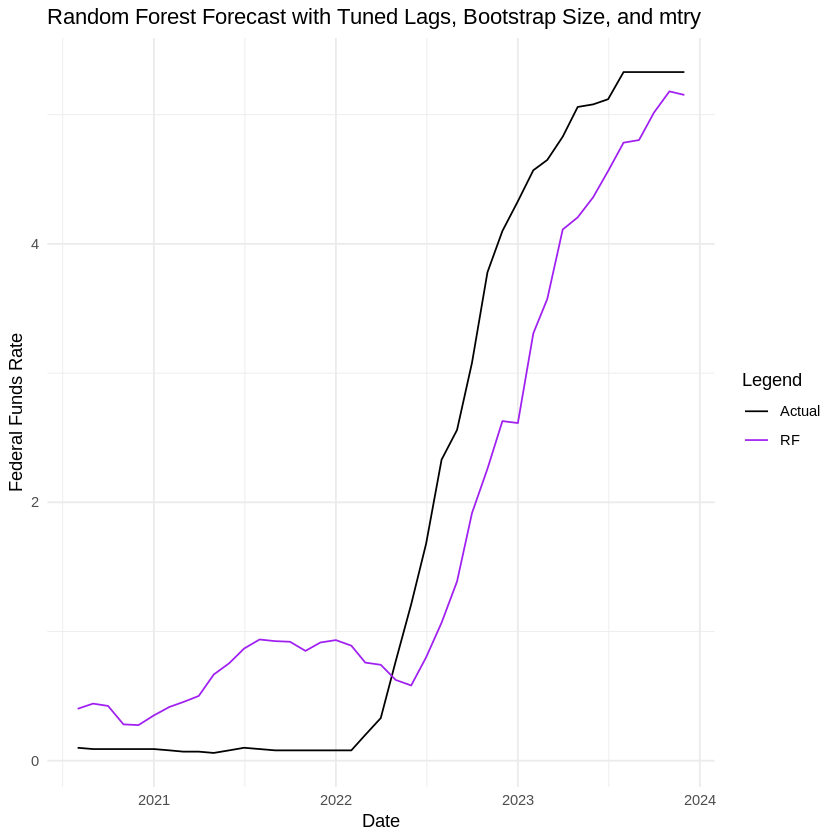

Test Set RMSE: 0.3090597 


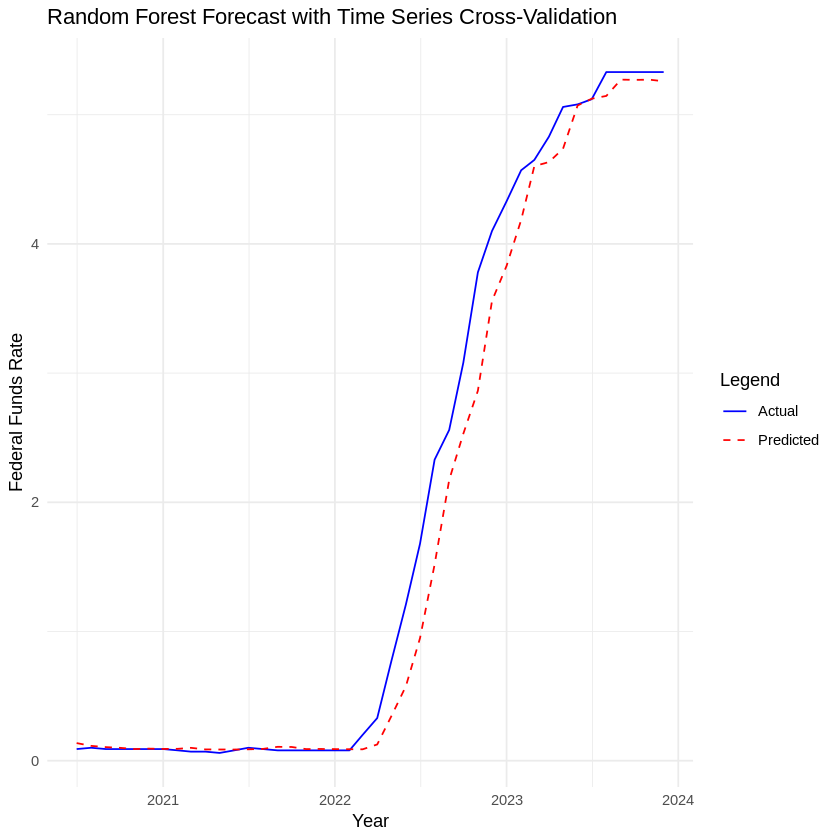

In [ ]:
###############################################
# Install and Load Required Libraries
###############################################
if (!require(randomForest)) install.packages("randomForest")
if (!require(forecast)) install.packages("forecast")
if (!require(vars)) install.packages("vars")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(tseries)) install.packages("tseries")
if (!require(ggplot2)) install.packages("ggplot2")

library(randomForest)
library(forecast)
library(vars)
library(tidyverse)
library(tseries)
library(ggplot2)

###############################################
# Load and Prepare Data
###############################################

cli_gdp_proxy <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=USALOLITONOSTSAM", stringsAsFactors = FALSE)
fedfunds <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS", stringsAsFactors = FALSE)
cpi <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL", stringsAsFactors = FALSE)

# Convert DATE columns to Date type
cli_gdp_proxy$DATE <- as.Date(cli_gdp_proxy$DATE)
fedfunds$DATE <- as.Date(fedfunds$DATE)
cpi$DATE <- as.Date(cpi$DATE)

# Merge datasets by DATE
data <- reduce(
  list(cli_gdp_proxy, fedfunds, cpi),
  full_join,
  by = "DATE"
)
colnames(data) <- c("DATE", "GDPPROXY", "FEDFUNDS", "CPIAUCSL")


# Filter training data (1985-01 to 2019-12)
train_data <- data %>%
  filter(DATE >= as.Date("1985-01-01") & DATE <= as.Date("2019-12-01"))

# Filter test data (2020-01 to 2023-12)
test_data <- data %>%
  filter(DATE >= as.Date("2020-01-01") & DATE <= as.Date("2023-12-01"))

add_lags <- function(data, lags) {
  for (lag in 1:lags) {
    data <- data %>%
      mutate(
        !!paste0("FEDFUNDS_lag", lag) := lag(FEDFUNDS, lag),
        !!paste0("CPIAUCSL_diff_lag", lag) := lag(CPIAUCSL_diff, lag),
        !!paste0("GDPPROXY_lag", lag) := lag(GDPPROXY, lag)
      )
  }
  return(data %>% na.omit())
}

# Add first differences to training and test datasets
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL))
  ) %>%
  na.omit()

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL))
  ) %>%
  na.omit()

# Define the number of lags
lags <- 10

# Add lagged variables to training and test datasets
train_rf <- train_data %>%
  dplyr::select(FEDFUNDS, CPIAUCSL_diff, GDPPROXY) %>%
  add_lags(lags)

test_rf <- test_data %>%
  dplyr::select(FEDFUNDS, CPIAUCSL_diff, GDPPROXY) %>%
  add_lags(lags)



###############################################
# Drop Unemployment RF Estimation:
###############################################

# Prepare explicit training, validation, and test subsets
train_rf <- train_data %>%
  filter(DATE < as.Date("2015-01-01")) %>%
  dplyr::select(FEDFUNDS, CPIAUCSL_diff, GDPPROXY) %>%
  na.omit()

validation_rf <- train_data %>%
  filter(DATE >= as.Date("2015-01-01") & DATE < as.Date("2020-01-01")) %>%
  dplyr::select(FEDFUNDS, CPIAUCSL_diff, GDPPROXY) %>%
  na.omit()

test_rf <- test_data %>%
  dplyr::select(FEDFUNDS, CPIAUCSL_diff, GDPPROXY) %>%
  na.omit()

# Add lagged variables function
add_lags <- function(data, lags) {
  for (lag in 1:lags) {
    data <- data %>%
      mutate(
        !!paste0("FEDFUNDS_lag", lag) := lag(FEDFUNDS, lag),
        !!paste0("CPIAUCSL_diff_lag", lag) := lag(CPIAUCSL_diff, lag),
        !!paste0("GDPPROXY_lag", lag) := lag(GDPPROXY, lag)
      )
  }
  return(data %>% na.omit())
}

# Function to evaluate model performance on validation set
evaluate_model <- function(lags, bootstrap_size, mtry) {
  # Add lagged variables to training and validation sets
  train_lagged <- add_lags(train_rf, lags)
  validation_lagged <- add_lags(validation_rf, lags)

  # Determine bootstrap sample size
  sample_size <- floor(bootstrap_size * nrow(train_lagged))
  bootstrap_idx <- sample(1:nrow(train_lagged), size = sample_size, replace = TRUE)

  # Train Random Forest model
  rf_model <- randomForest(
    FEDFUNDS ~ .,  # All features
    data = train_lagged[bootstrap_idx, ],
    ntree = 100,  # Fixed number of trees
    mtry = mtry  # Number of features to consider
  )

  # Predict on validation set
  predictions <- predict(rf_model, validation_lagged)

  # Calculate RMSE on validation set
  RMSE <- sqrt(mean((validation_lagged$FEDFUNDS - predictions)^2, na.rm = TRUE))
  return(RMSE)
}

# Grid of lags, bootstrap sizes, and mtry to tune
lags_grid <- seq(1, 12, by = 1)  # Lags from 1 to 12
bootstrap_grid <- seq(0.6, 1.0, by = 0.05)  # Bootstrap sizes from 60% to 100%
mtry_grid <- seq(1, ncol(train_rf) - 1, by = 1)  # Number of features considered at each split

# Expand grid
tune_grid <- expand.grid(lags = lags_grid, bootstrap_size = bootstrap_grid, mtry = mtry_grid)

# Evaluate RMSE for each combination on the validation set
results <- tune_grid %>%
  mutate(RMSE = purrr::pmap_dbl(.,
                                ~evaluate_model(lags = ..1, bootstrap_size = ..2, mtry = ..3)))

# Find the best parameters
best_params <- results %>% filter(RMSE == min(RMSE))
print(best_params)

# Train the final model with the best parameters using training + validation data
optimal_lags <- best_params$lags
optimal_bootstrap <- best_params$bootstrap_size
optimal_mtry <- best_params$mtry

# Combine training and validation sets for final model training
final_train_rf <- rbind(train_rf, validation_rf)
final_train_rf <- add_lags(final_train_rf, optimal_lags)
final_test_rf <- add_lags(test_rf, optimal_lags)

# Bootstrap sampling for the final model
final_sample_size <- floor(optimal_bootstrap * nrow(final_train_rf))
final_bootstrap_idx <- sample(1:nrow(final_train_rf), size = final_sample_size, replace = TRUE)

# Train the final Random Forest model
final_rf_model <- randomForest(
  FEDFUNDS ~ .,
  data = final_train_rf[final_bootstrap_idx, ],
  ntree = 100,
  mtry = optimal_mtry
)

# Make predictions on the test set
final_predictions <- predict(final_rf_model, final_test_rf)

# Calculate RMSE for the final model on the test set
final_rmse_unemployment_est <- sqrt(mean((final_test_rf$FEDFUNDS - final_predictions)^2, na.rm = TRUE))
cat("Final RMSE:", final_rmse_unemployment_est, "\n")

# Visualize Predictions
forecast_results_unemployment_est <- data.frame(
  DATE = test_data$DATE[(nrow(test_data) - nrow(final_test_rf) + 1):nrow(test_data)],
  Actual_FEDFUNDS = final_test_rf$FEDFUNDS,
  RF = final_predictions
)

ggplot(forecast_results_unemployment_est, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = RF, color = "RF")) +
  labs(
    title = "Random Forest Forecast with Tuned Lags, Bootstrap Size, and mtry",
    x = "Date",
    y = "Federal Funds Rate"
  ) +
  scale_color_manual(
    values = c("Actual" = "black", "RF" = "purple"),
    name = "Legend"
  ) +
  theme_minimal()



#########################################################
# Drop Unemployment RF with Time Series Cross-Validation:
########################################################

# Load necessary libraries
if (!require(caret)) install.packages("caret", dependencies = TRUE)
if (!require(randomForest)) install.packages("randomForest")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(ggplot2)) install.packages("ggplot2")

library(caret)
library(randomForest)
library(tidyverse)
library(ggplot2)

# Prepare the dataset
# Use all data up to 2019 for cross-validation
train_ts <- train_data %>%
  filter(DATE < as.Date("2020-01-01")) %>%
  dplyr::select(FEDFUNDS, CPIAUCSL_diff, GDPPROXY) %>%
  na.omit()

# Add lagged variables function
add_lags <- function(data, lags) {
  for (lag in 1:lags) {
    data <- data %>%
      mutate(
        !!paste0("FEDFUNDS_lag", lag) := lag(FEDFUNDS, lag),
        !!paste0("CPIAUCSL_diff_lag", lag) := lag(CPIAUCSL_diff, lag),
        !!paste0("GDPPROXY_lag", lag) := lag(GDPPROXY, lag)
      )
  }
  return(data %>% na.omit())
}

# Add lags to the training data
lags <- 5  # The optimal lag value from the RF
train_ts <- add_lags(train_ts, lags)

# Define training control with time-slice cross-validation
train_control <- trainControl(
  method = "timeslice",          # Time-series cross-validation
  initialWindow = floor(0.7 * nrow(train_ts)),  # Initial training size (70% of the data)
  horizon = 12,                  # Forecast horizon (12 months ahead)
  fixedWindow = TRUE,            # Fixed-size rolling window
  allowParallel = FALSE          # Disable parallel processing
)

# Define the Random Forest model using caret
set.seed(123)
rf_model <- train(
  FEDFUNDS ~ .,                  # Use all features to predict FEDFUNDS
  data = train_ts,               # Time series data with lags
  method = "rf",                 # Random Forest method
  trControl = train_control,     # Time-slice cross-validation
  tuneGrid = expand.grid(
    mtry = seq(1, ncol(train_ts) - 1, by = 1)  # Tune mtry (number of features)
  ),
  ntree = 100                    # Fixed number of trees
)

# Print the results of the model
cat("Best Random Forest Model Parameters:\n")
print(rf_model$bestTune)

# Forecast using the trained Random Forest model
# Use the data up to 2019 to train the final model
final_rf_model <- rf_model$finalModel

# Prepare the test data (2020 onward) for prediction
test_ts <- test_data %>%
  dplyr::select(FEDFUNDS, CPIAUCSL_diff, GDPPROXY) %>%
  na.omit() %>%
  add_lags(lags)

# Make predictions on the test data
final_predictions <- predict(final_rf_model, newdata = test_ts)

# Combine actual and predicted values for visualization
forecast_results_unemployment_cv <- data.frame(
  DATE = test_data$DATE[(nrow(test_data) - nrow(test_ts) + 1):nrow(test_data)],
  Actual_FEDFUNDS = test_ts$FEDFUNDS,
  RF_Predicted = final_predictions
)

# Plot actual vs predicted values
ggplot(forecast_results_unemployment_cv, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = RF_Predicted, color = "Predicted"), linetype = "dashed") +
  labs(
    title = "Random Forest Forecast with Time Series Cross-Validation",
    x = "Year",
    y = "Federal Funds Rate"
  ) +
  scale_color_manual(
    values = c("Actual" = "blue", "Predicted" = "red"),
    name = "Legend"
  ) +
  theme_minimal()

# Calculate RMSE for the test set
test_rmse_unemployment_cv <- sqrt(mean((test_ts$FEDFUNDS - final_predictions)^2, na.rm = TRUE))
cat("Test Set RMSE:", test_rmse_unemployment_cv, "\n")

# RF Models with BBK GDP Proxy

  lags bootstrap_size mtry    RMSE
1    2            0.8    3 0.18255
Final RMSE: 0.6529305 
Best Random Forest Model Parameters:
   mtry
19   19


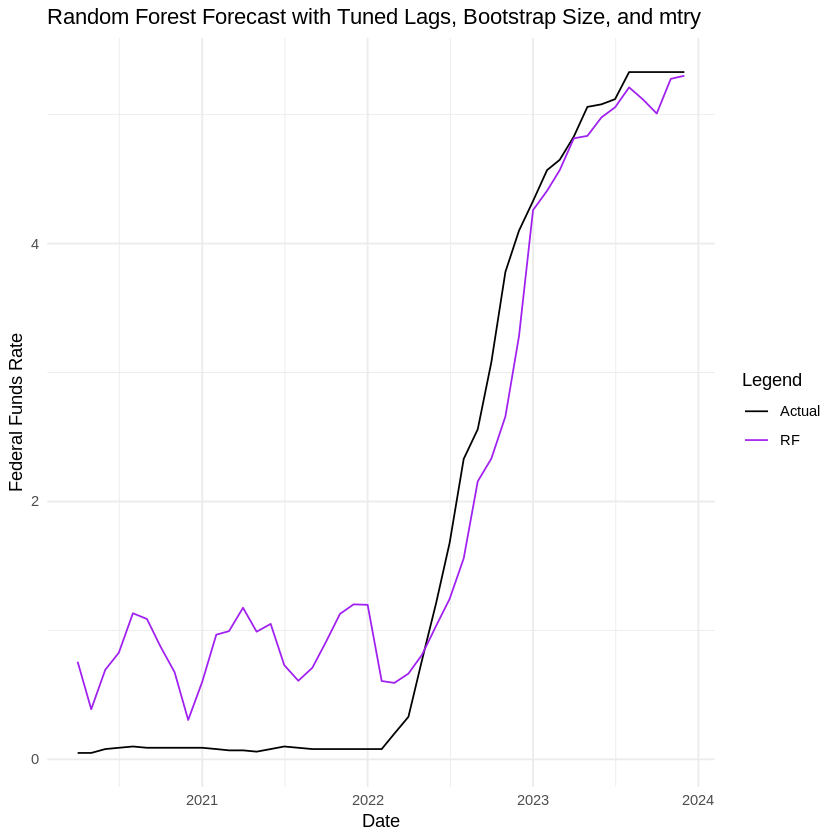

Test Set RMSE: 0.2971695 


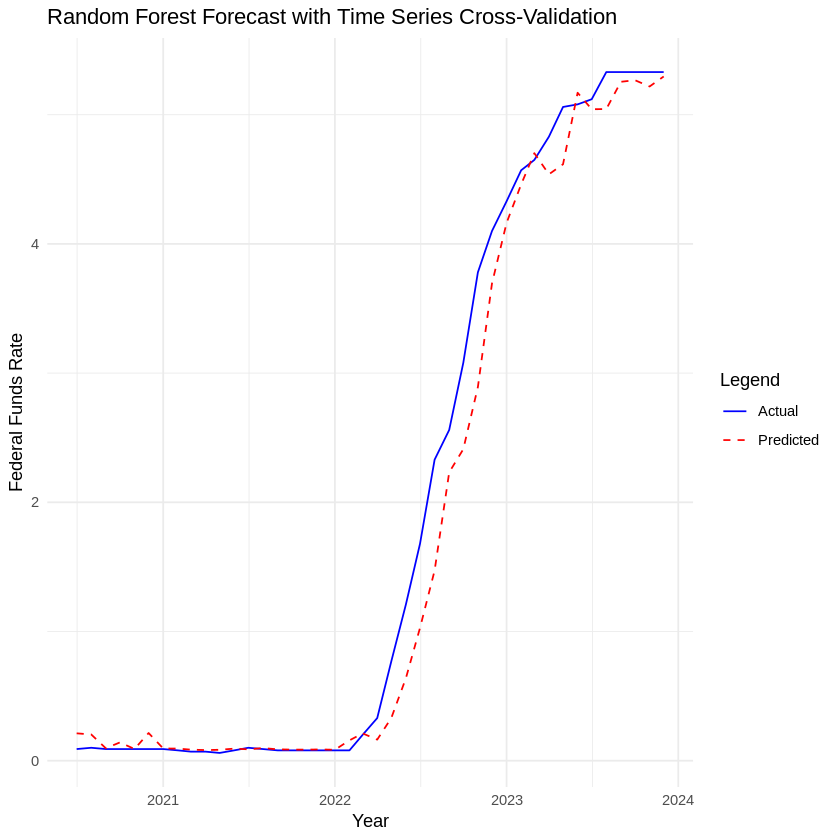

In [ ]:
###############################################
# Install and Load Required Libraries
###############################################
if (!require(randomForest)) install.packages("randomForest")
if (!require(forecast)) install.packages("forecast")
if (!require(vars)) install.packages("vars")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(tseries)) install.packages("tseries")
if (!require(ggplot2)) install.packages("ggplot2")

library(randomForest)
library(forecast)
library(vars)
library(tidyverse)
library(tseries)
library(ggplot2)

###############################################
# Load and Prepare Data
###############################################

bbk_gdp <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=BBKMGDP", stringsAsFactors = FALSE)
fedfunds <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS", stringsAsFactors = FALSE)
unrate <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE", stringsAsFactors = FALSE)
cpi <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL", stringsAsFactors = FALSE)

# Convert DATE columns to Date type
bbk_gdp$DATE <- as.Date(bbk_gdp$DATE)
fedfunds$DATE <- as.Date(fedfunds$DATE)
unrate$DATE <- as.Date(unrate$DATE)
cpi$DATE <- as.Date(cpi$DATE)

# Merge datasets by DATE
data <- reduce(
  list(bbk_gdp, fedfunds, unrate, cpi),
  full_join,
  by = "DATE"
)
colnames(data) <- c("DATE", "BBKGDP", "FEDFUNDS", "UNRATE", "CPIAUCSL")


# Filter training data (1985-01 to 2019-12)
train_data <- data %>%
  filter(DATE >= as.Date("1985-01-01") & DATE <= as.Date("2019-12-01"))

# Filter test data (2020-01 to 2023-12)
test_data <- data %>%
  filter(DATE >= as.Date("2020-01-01") & DATE <= as.Date("2023-12-01"))

add_lags <- function(data, lags) {
  for (lag in 1:lags) {
    data <- data %>%
      mutate(
        !!paste0("FEDFUNDS_lag", lag) := lag(FEDFUNDS, lag),
        !!paste0("UNRATE_diff_lag", lag) := lag(UNRATE_diff, lag),
        !!paste0("CPIAUCSL_diff_lag", lag) := lag(CPIAUCSL_diff, lag),
        !!paste0("BBKGDP_lag", lag) := lag(BBKGDP, lag)
      )
  }
  return(data %>% na.omit())
}

# Add first differences to training and test datasets
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

test_data <- test_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

# Define the number of lags
lags <- 10

# Add lagged variables to training and test datasets
train_rf <- train_data %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, BBKGDP) %>%
  add_lags(lags)

test_rf <- test_data %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, BBKGDP) %>%
  add_lags(lags)



###############################################
# BBK RF Estimation:
###############################################

# Prepare explicit training, validation, and test subsets
train_rf <- train_data %>%
  filter(DATE < as.Date("2015-01-01")) %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, BBKGDP) %>%
  na.omit()

validation_rf <- train_data %>%
  filter(DATE >= as.Date("2015-01-01") & DATE < as.Date("2020-01-01")) %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, BBKGDP) %>%
  na.omit()

test_rf <- test_data %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, BBKGDP) %>%
  na.omit()

# Add lagged variables function
add_lags <- function(data, lags) {
  for (lag in 1:lags) {
    data <- data %>%
      mutate(
        !!paste0("FEDFUNDS_lag", lag) := lag(FEDFUNDS, lag),
        !!paste0("UNRATE_diff_lag", lag) := lag(UNRATE_diff, lag),
        !!paste0("CPIAUCSL_diff_lag", lag) := lag(CPIAUCSL_diff, lag),
        !!paste0("BBKGDP_lag", lag) := lag(BBKGDP, lag)
      )
  }
  return(data %>% na.omit())
}

# Function to evaluate model performance on validation set
evaluate_model <- function(lags, bootstrap_size, mtry) {
  # Add lagged variables to training and validation sets
  train_lagged <- add_lags(train_rf, lags)
  validation_lagged <- add_lags(validation_rf, lags)

  # Determine bootstrap sample size
  sample_size <- floor(bootstrap_size * nrow(train_lagged))
  bootstrap_idx <- sample(1:nrow(train_lagged), size = sample_size, replace = TRUE)

  # Train Random Forest model
  rf_model <- randomForest(
    FEDFUNDS ~ .,  # All features
    data = train_lagged[bootstrap_idx, ],
    ntree = 100,  # Fixed number of trees
    mtry = mtry  # Number of features to consider
  )

  # Predict on validation set
  predictions <- predict(rf_model, validation_lagged)

  # Calculate RMSE on validation set
  RMSE <- sqrt(mean((validation_lagged$FEDFUNDS - predictions)^2, na.rm = TRUE))
  return(RMSE)
}

# Grid of lags, bootstrap sizes, and mtry to tune
lags_grid <- seq(1, 12, by = 1)  # Lags from 1 to 12
bootstrap_grid <- seq(0.6, 1.0, by = 0.05)  # Bootstrap sizes from 60% to 100%
mtry_grid <- seq(1, ncol(train_rf) - 1, by = 1)  # Number of features considered at each split

# Expand grid
tune_grid <- expand.grid(lags = lags_grid, bootstrap_size = bootstrap_grid, mtry = mtry_grid)

# Evaluate RMSE for each combination on the validation set
results <- tune_grid %>%
  mutate(RMSE = purrr::pmap_dbl(.,
                                ~evaluate_model(lags = ..1, bootstrap_size = ..2, mtry = ..3)))

# Find the best parameters
best_params <- results %>% filter(RMSE == min(RMSE))
print(best_params)

# Train the final model with the best parameters using training + validation data
optimal_lags <- best_params$lags
optimal_bootstrap <- best_params$bootstrap_size
optimal_mtry <- best_params$mtry

# Combine training and validation sets for final model training
final_train_rf <- rbind(train_rf, validation_rf)
final_train_rf <- add_lags(final_train_rf, optimal_lags)
final_test_rf <- add_lags(test_rf, optimal_lags)

# Bootstrap sampling for the final model
final_sample_size <- floor(optimal_bootstrap * nrow(final_train_rf))
final_bootstrap_idx <- sample(1:nrow(final_train_rf), size = final_sample_size, replace = TRUE)

# Train the final Random Forest model
final_rf_model <- randomForest(
  FEDFUNDS ~ .,
  data = final_train_rf[final_bootstrap_idx, ],
  ntree = 100,
  mtry = optimal_mtry
)

# Make predictions on the test set
final_predictions <- predict(final_rf_model, final_test_rf)

# Calculate RMSE for the final model on the test set
final_rmse_bbk_est <- sqrt(mean((final_test_rf$FEDFUNDS - final_predictions)^2, na.rm = TRUE))
cat("Final RMSE:", final_rmse_bbk_est, "\n")


# Visualize Predictions
forecast_results_bbk_est <- data.frame(
  DATE = test_data$DATE[(nrow(test_data) - nrow(final_test_rf) + 1):nrow(test_data)],
  Actual_FEDFUNDS = final_test_rf$FEDFUNDS,
  RF = final_predictions
)

ggplot(forecast_results_bbk_est, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = RF, color = "RF")) +
  labs(
    title = "Random Forest Forecast with Tuned Lags, Bootstrap Size, and mtry",
    x = "Date",
    y = "Federal Funds Rate"
  ) +
  scale_color_manual(
    values = c("Actual" = "black", "RF" = "purple"),
    name = "Legend"
  ) +
  theme_minimal()



###############################################
# BBK RF with Time Series Cross-Validation:
###############################################

# Load necessary libraries
if (!require(caret)) install.packages("caret", dependencies = TRUE)
if (!require(randomForest)) install.packages("randomForest")
if (!require(tidyverse)) install.packages("tidyverse")
if (!require(ggplot2)) install.packages("ggplot2")

library(caret)
library(randomForest)
library(tidyverse)
library(ggplot2)

# Prepare the dataset
# Use all data up to 2019 for cross-validation
train_ts <- train_data %>%
  filter(DATE < as.Date("2020-01-01")) %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, BBKGDP) %>%
  na.omit()

# Add lagged variables function
add_lags <- function(data, lags) {
  for (lag in 1:lags) {
    data <- data %>%
      mutate(
        !!paste0("FEDFUNDS_lag", lag) := lag(FEDFUNDS, lag),
        !!paste0("UNRATE_diff_lag", lag) := lag(UNRATE_diff, lag),
        !!paste0("CPIAUCSL_diff_lag", lag) := lag(CPIAUCSL_diff, lag),
        !!paste0("BBKGDP_lag", lag) := lag(BBKGDP, lag)
      )
  }
  return(data %>% na.omit())
}

# Add lags to the training data
lags <- 5  # The optimal lag value from the RF
train_ts <- add_lags(train_ts, lags)

# Define training control with time-slice cross-validation
train_control <- trainControl(
  method = "timeslice",          # Time-series cross-validation
  initialWindow = floor(0.7 * nrow(train_ts)),  # Initial training size (70% of the data)
  horizon = 12,                  # Forecast horizon (12 months ahead)
  fixedWindow = TRUE,            # Fixed-size rolling window
  allowParallel = FALSE          # Disable parallel processing
)

# Define the Random Forest model using caret
set.seed(123)
rf_model <- train(
  FEDFUNDS ~ .,                  # Use all features to predict FEDFUNDS
  data = train_ts,               # Time series data with lags
  method = "rf",                 # Random Forest method
  trControl = train_control,     # Time-slice cross-validation
  tuneGrid = expand.grid(
    mtry = seq(1, ncol(train_ts) - 1, by = 1)  # Tune mtry (number of features)
  ),
  ntree = 100                    # Fixed number of trees
)

# Print the results of the model
cat("Best Random Forest Model Parameters:\n")
print(rf_model$bestTune)

# Forecast using the trained Random Forest model
# Use the data up to 2019 to train the final model
final_rf_model <- rf_model$finalModel

# Prepare the test data (2020 onward) for prediction
test_ts <- test_data %>%
  dplyr::select(FEDFUNDS, UNRATE_diff, CPIAUCSL_diff, BBKGDP) %>%
  na.omit() %>%
  add_lags(lags)

# Make predictions on the test data
final_predictions <- predict(final_rf_model, newdata = test_ts)

# Combine actual and predicted values for visualization
forecast_results_bbk_cv <- data.frame(
  DATE = test_data$DATE[(nrow(test_data) - nrow(test_ts) + 1):nrow(test_data)],
  Actual_FEDFUNDS = test_ts$FEDFUNDS,
  RF_Predicted = final_predictions
)

# Plot actual vs predicted values
ggplot(forecast_results_bbk_cv, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = RF_Predicted, color = "Predicted"), linetype = "dashed") +
  labs(
    title = "Random Forest Forecast with Time Series Cross-Validation",
    x = "Year",
    y = "Federal Funds Rate"
  ) +
  scale_color_manual(
    values = c("Actual" = "blue", "Predicted" = "red"),
    name = "Legend"
  ) +
  theme_minimal()

# Calculate RMSE for the test set
test_rmse_bbk_cv <- sqrt(mean((test_ts$FEDFUNDS - final_predictions)^2, na.rm = TRUE))
cat("Test Set RMSE:", test_rmse_bbk_cv, "\n")

# Visualisations


## Tables with ADF test statistics and autocorrelation functions (ACF/PACF)




ADF Test Results (Raw Variables):


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 GDPPROXY :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -4.2364, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


 FEDFUNDS :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -3.5128, Lag order = 7, p-value = 0.04139
alternative hypothesis: stationary


 UNRATE :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -2.7096, Lag order = 7, p-value = 0.2776
alternative hypothesis: stationary


 CPIAUCSL :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -2.5241, Lag order = 7, p-value = 0.356
alternative hypothesis: stationary


ADF Test Results (Differenced Variables):


Warning message in adf.test(ts_data, alternative = "stationary"):
“p-value smaller than printed p-value”



 Differenced CPI :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -7.7825, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


 Differenced UNRATE :

	Augmented Dickey-Fuller Test

data:  ts_data
Dickey-Fuller = -3.8915, Lag order = 7, p-value = 0.01459
alternative hypothesis: stationary



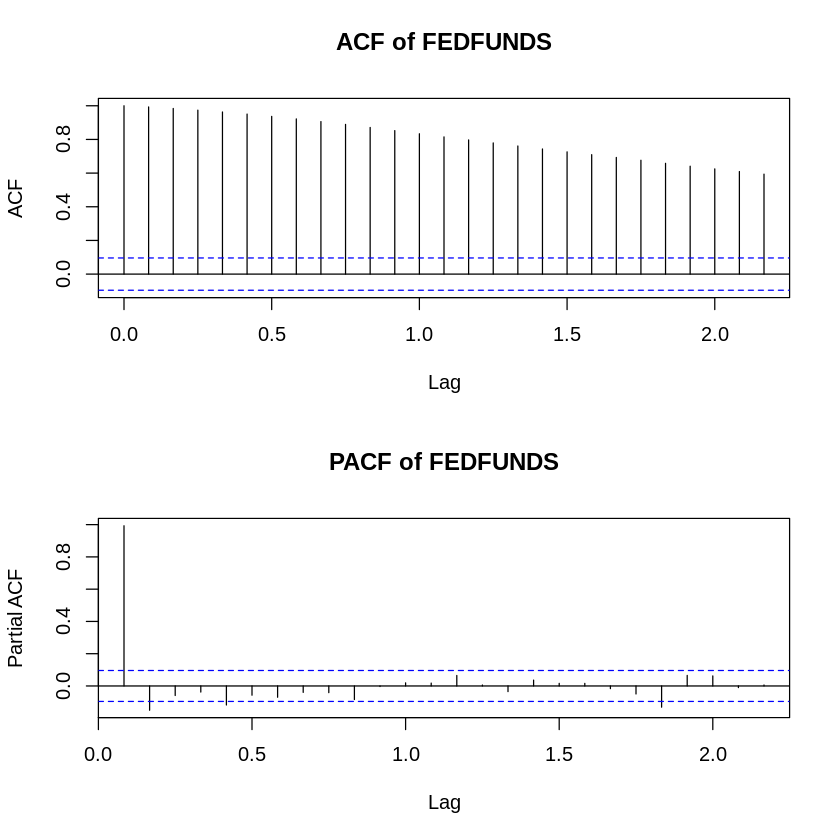

In [ ]:
# Function to perform the Augmented Dickey-Fuller (ADF) test and display results
check_stationarity <- function(ts_data, variable_name) {
  adf_result <- adf.test(ts_data, alternative = "stationary")
  cat("\n", variable_name, ":\n")
  print(adf_result)
}

# ADF test for the 5 raw variables
cat("ADF Test Results (Raw Variables):\n")
check_stationarity(cli_gdp_proxy_ts, "GDPPROXY")
check_stationarity(fedfunds_ts, "FEDFUNDS")
check_stationarity(unrate_ts, "UNRATE")
check_stationarity(cpi_ts, "CPIAUCSL")

# Differencing unemployment and CPI to check stationarity
train_data <- train_data %>%
  mutate(
    CPIAUCSL_diff = c(NA, diff(CPIAUCSL)),
    UNRATE_diff = c(NA, diff(UNRATE))
  ) %>%
  na.omit()

# ADF test for the differenced variables
cat("\nADF Test Results (Differenced Variables):\n")
cpi_diff_ts <- ts(train_data$CPIAUCSL_diff, start = c(1985, 2), frequency = 12)
unrate_diff_ts <- ts(train_data$UNRATE_diff, start = c(1985, 2), frequency = 12)

check_stationarity(cpi_diff_ts, "Differenced CPI")
check_stationarity(unrate_diff_ts, "Differenced UNRATE")

# Plotting ACF and PACF for FEDFUNDS
par(mfrow = c(2, 1))  # Arrange plots in 2 rows
acf(fedfunds_ts, main = "ACF of FEDFUNDS")
pacf(fedfunds_ts, main = "PACF of FEDFUNDS")


## Plot all 5 variables in separate diagrams for different time periods

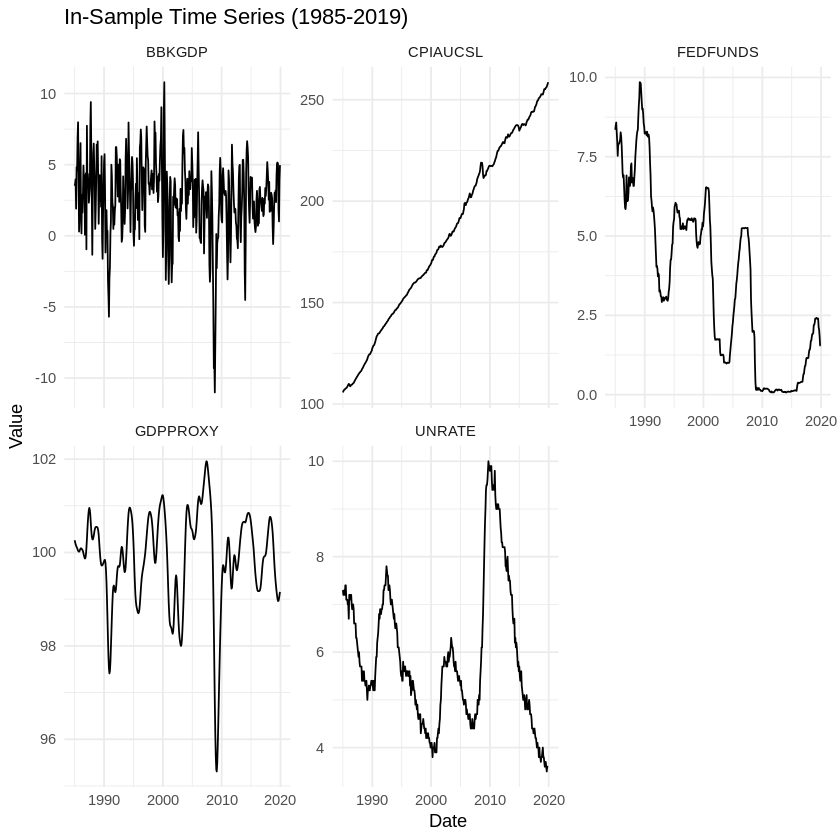

In [ ]:
# Load the datasets
cli_gdp_proxy <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=USALOLITONOSTSAM", stringsAsFactors = FALSE)
fedfunds <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=FEDFUNDS", stringsAsFactors = FALSE)
unrate <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=UNRATE", stringsAsFactors = FALSE)
cpi <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=CPIAUCSL", stringsAsFactors = FALSE)
bbk_gdp <- read.csv("https://fred.stlouisfed.org/graph/fredgraph.csv?id=BBKMGDP", stringsAsFactors = FALSE)

# Convert DATE columns to Date type and align data
cli_gdp_proxy$DATE <- as.Date(cli_gdp_proxy$DATE)
fedfunds$DATE <- as.Date(fedfunds$DATE)
unrate$DATE <- as.Date(unrate$DATE)
cpi$DATE <- as.Date(cpi$DATE)
bbk_gdp$DATE <- as.Date(bbk_gdp$DATE)

# Merge all datasets on DATE
data <- reduce(
  list(cli_gdp_proxy, fedfunds, unrate, cpi, bbk_gdp),
  full_join,
  by = "DATE"
)
colnames(data) <- c("DATE", "GDPPROXY", "FEDFUNDS", "UNRATE", "CPIAUCSL", "BBKGDP")

# Filter training data (1985-01 to 2019-12)
train_data <- data %>%
  filter(DATE >= as.Date("1985-01-01") & DATE <= as.Date("2019-12-01"))

# Filter test data (2020-01 to 2023-12)
test_data <- data %>%
  filter(DATE >= as.Date("2020-01-01") & DATE <= as.Date("2023-12-01"))

# Prepare time series objects
cli_gdp_proxy_ts <- ts(train_data$GDPPROXY, start = c(1985, 1), frequency = 12)
fedfunds_ts <- ts(train_data$FEDFUNDS, start = c(1985, 1), frequency = 12)
unrate_ts <- ts(train_data$UNRATE, start = c(1985, 1), frequency = 12)
cpi_ts <- ts(train_data$CPIAUCSL, start = c(1985, 1), frequency = 12)
bbk_gdp_ts <- ts(train_data$BBKGDP, start = c(1985, 1), frequency = 12)

# Plot the 5 time series in separate diagrams
plot_data <- train_data %>%
  dplyr::select(DATE, GDPPROXY, FEDFUNDS, UNRATE, CPIAUCSL, BBKGDP) %>%
  pivot_longer(
    cols = -DATE,
    names_to = "Variable",
    values_to = "Value"
  )

ggplot(plot_data, aes(x = DATE, y = Value)) +
  geom_line() +
  facet_wrap(~ Variable, scales = "free_y") + # Separate panels for each variable
  labs(
    title = "In-Sample Time Series (1985-2019)",
    x = "Date",
    y = "Value"
  ) +
  theme_minimal()

## Plot actual values against forecasts for the four models

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_line()`).”


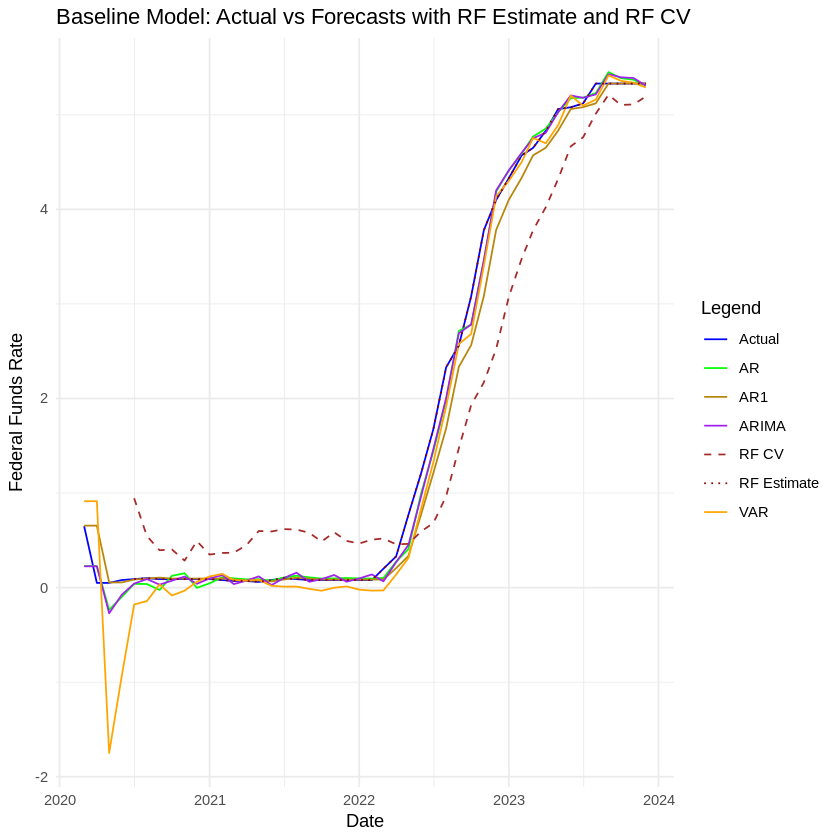

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_line()`).”


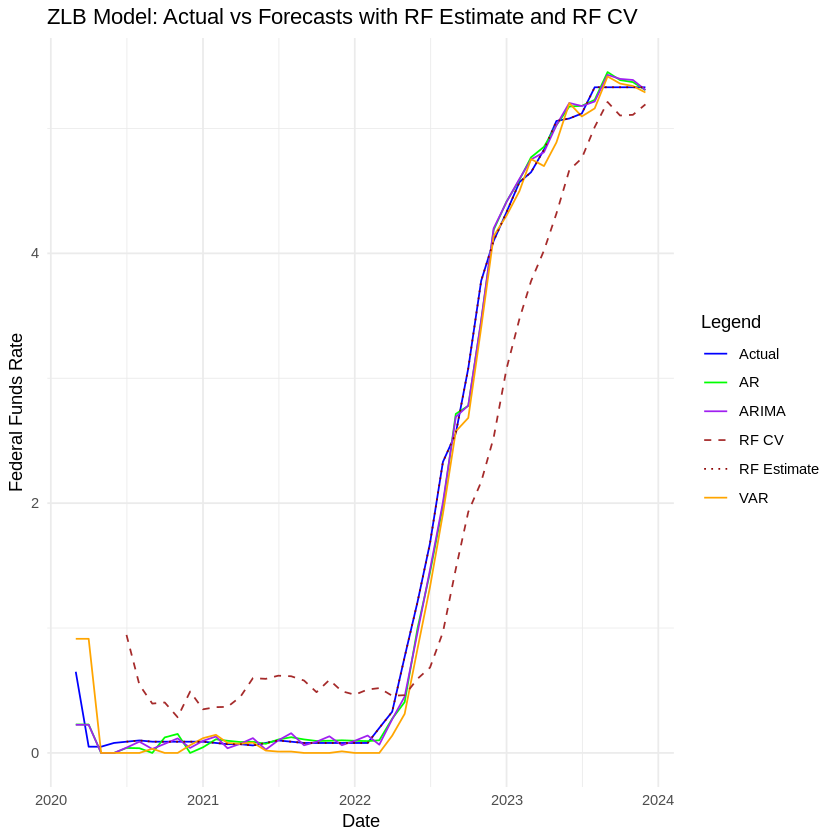

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


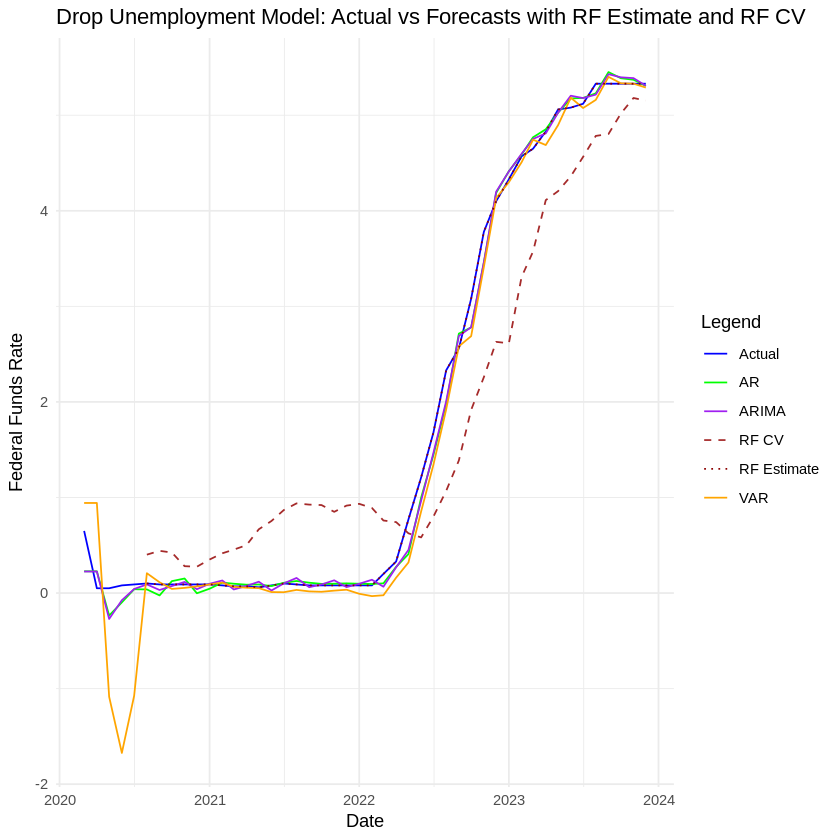

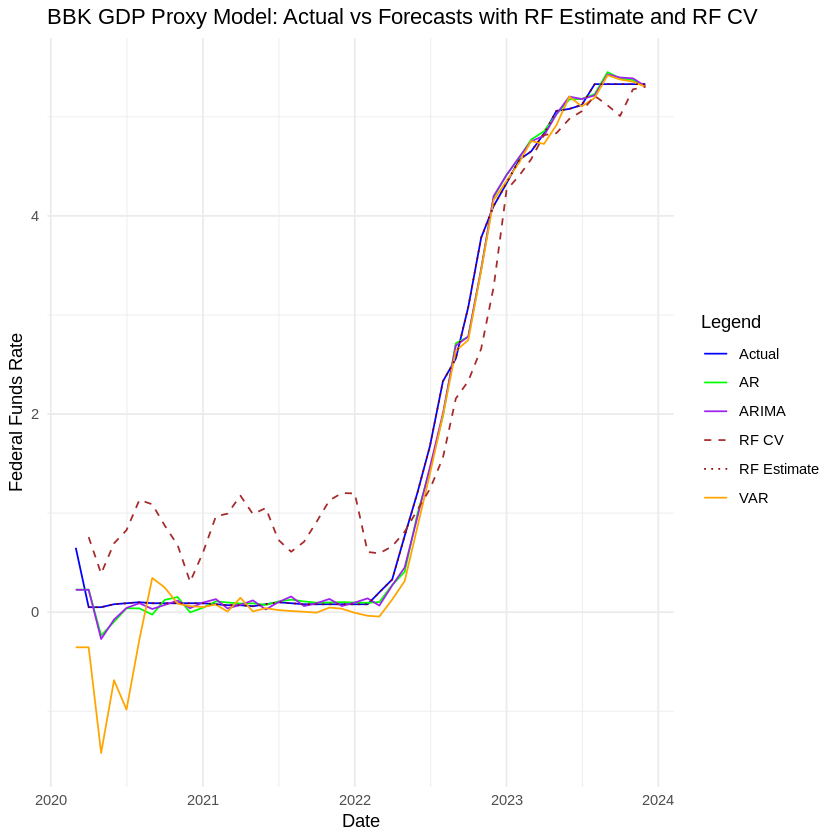

In [ ]:
# 1. Baseline Plot
# Merge RF Estimate and RF CV forecasts
baseline_combined <- merge(forecast_results_baseline_est, forecast_results_baseline_cv, by = "DATE", all = TRUE)
colnames(baseline_combined) <- c("DATE", "RF_Estimate", "RF_CV")

# Merge with TS forecasts and actual data
baseline_data <- merge(forecast_results_baseline, baseline_combined, by = "DATE", all.x = TRUE)

# Plot
ggplot(data = baseline_data, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = AR, color = "AR")) +
  geom_line(aes(y = AR1, color = "AR1")) +
  geom_line(aes(y = ARIMA, color = "ARIMA")) +
  geom_line(aes(y = VAR, color = "VAR")) +
  geom_line(aes(y = RF_Estimate, color = "RF Estimate"), linetype = "dotted") +
  geom_line(aes(y = RF_CV, color = "RF CV"), linetype = "dashed") +
  labs(
    title = "Baseline Model: Actual vs Forecasts with RF Estimate and RF CV",
    x = "Date",
    y = "Federal Funds Rate",
    color = "Legend"
  ) +
  scale_color_manual(
    values = c(
      "Actual" = "blue",
      "AR" = "green",
      "AR1" = "darkgoldenrod",
      "ARIMA" = "purple",
      "VAR" = "orange",
      "RF Estimate" = "darkred",
      "RF CV" = "brown"
    )
  ) +
  theme_minimal()

# 2. ZLB Plot
# Merge RF Estimate and RF CV forecasts
baseline_combined <- merge(forecast_results_baseline_est, forecast_results_baseline_cv, by = "DATE", all = TRUE)
colnames(baseline_combined) <- c("DATE", "RF_Estimate", "RF_CV")

# Merge with TS Forecasts and actual data
zlb_data <- merge(forecast_results_zlb, baseline_combined, by = "DATE", all.x = TRUE)

# Plot
ggplot(data = zlb_data, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = AR, color = "AR")) +
  geom_line(aes(y = ARIMA, color = "ARIMA")) +
  geom_line(aes(y = VAR, color = "VAR")) +
  geom_line(aes(y = RF_Estimate, color = "RF Estimate"), linetype = "dotted") +
  geom_line(aes(y = RF_CV, color = "RF CV"), linetype = "dashed") +
  labs(
    title = "ZLB Model: Actual vs Forecasts with RF Estimate and RF CV",
    x = "Date",
    y = "Federal Funds Rate",
    color = "Legend"
  ) +
  scale_color_manual(
    values = c(
      "Actual" = "blue",
      "AR" = "green",
      "AR1" = "darkgoldenrod",
      "ARIMA" = "purple",
      "VAR" = "orange",
      "RF Estimate" = "darkred",
      "RF CV" = "brown"
    )
  ) +
  theme_minimal()

# 3. Drop Unemployment Plot
# Merge RF Estimate and RF CV forecasts
unemployment_combined <- merge(forecast_results_unemployment_est, forecast_results_unemployment_cv, by = "DATE", all = TRUE)
colnames(unemployment_combined) <- c("DATE", "RF_Estimate", "RF_CV")

# Merge with TS Forecasts actual data
unemployment_data <- merge(forecast_results_unemployment, unemployment_combined, by = "DATE", all.x = TRUE)

# Plot
ggplot(data = unemployment_data, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = AR, color = "AR")) +
  geom_line(aes(y = ARIMA, color = "ARIMA")) +
  geom_line(aes(y = VAR, color = "VAR")) +
  geom_line(aes(y = RF_Estimate, color = "RF Estimate"), linetype = "dotted") +
  geom_line(aes(y = RF_CV, color = "RF CV"), linetype = "dashed") +
  labs(
    title = "Drop Unemployment Model: Actual vs Forecasts with RF Estimate and RF CV",
    x = "Date",
    y = "Federal Funds Rate",
    color = "Legend"
  ) +
  scale_color_manual(
    values = c(
      "Actual" = "blue",
      "AR" = "green",
      "ARIMA" = "purple",
      "VAR" = "orange",
      "RF Estimate" = "darkred",
      "RF CV" = "brown"
    )
  ) +
  theme_minimal()

# 4. BBK GDP Proxy Plot
# Merge RF Estimate and RF CV forecasts
bbk_combined <- merge(forecast_results_bbk_est, forecast_results_bbk_cv, by = "DATE", all = TRUE)
colnames(bbk_combined) <- c("DATE", "RF_Estimate", "RF_CV")

# Merge with TS Forecasts and actual data
bbk_data <- merge(forecast_results_bbk, bbk_combined, by = "DATE", all.x = TRUE)

# Plot
ggplot(data = bbk_data, aes(x = DATE)) +
  geom_line(aes(y = Actual_FEDFUNDS, color = "Actual")) +
  geom_line(aes(y = AR, color = "AR")) +
  geom_line(aes(y = ARIMA, color = "ARIMA")) +
  geom_line(aes(y = VAR, color = "VAR")) +
  geom_line(aes(y = RF_Estimate, color = "RF Estimate"), linetype = "dotted") +
  geom_line(aes(y = RF_CV, color = "RF CV"), linetype = "dashed") +
  labs(
    title = "BBK GDP Proxy Model: Actual vs Forecasts with RF Estimate and RF CV",
    x = "Date",
    y = "Federal Funds Rate",
    color = "Legend"
  ) +
  scale_color_manual(
    values = c(
      "Actual" = "blue",
      "AR" = "green",
      "ARIMA" = "purple",
      "VAR" = "orange",
      "RF Estimate" = "darkred",
      "RF CV" = "brown"
    )
  ) +
  theme_minimal()


## Plot RMSE for each model (Bar plot)

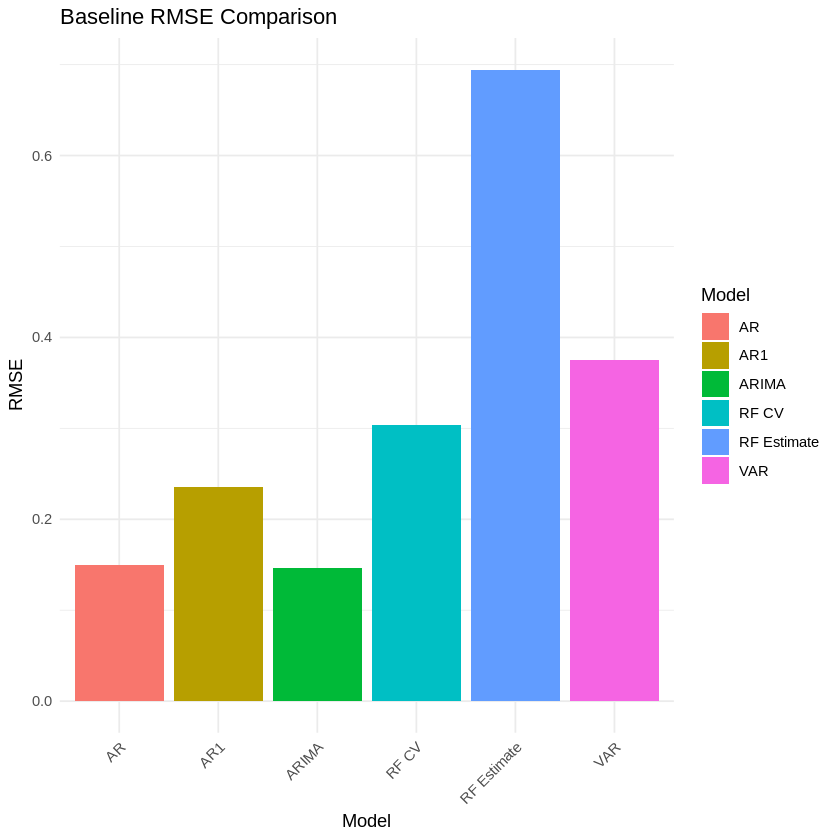

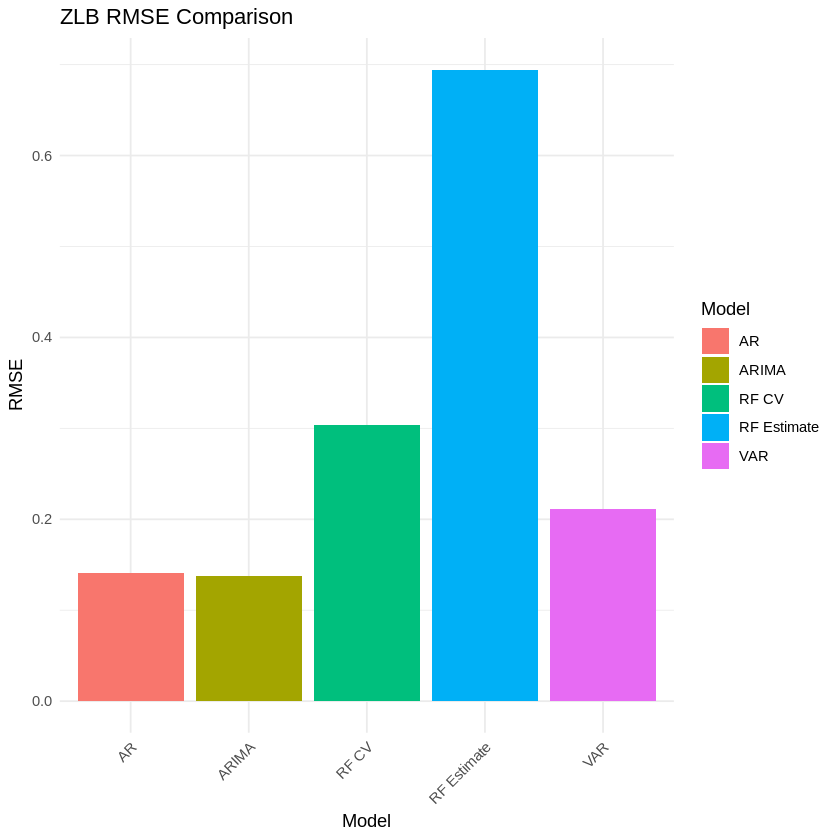

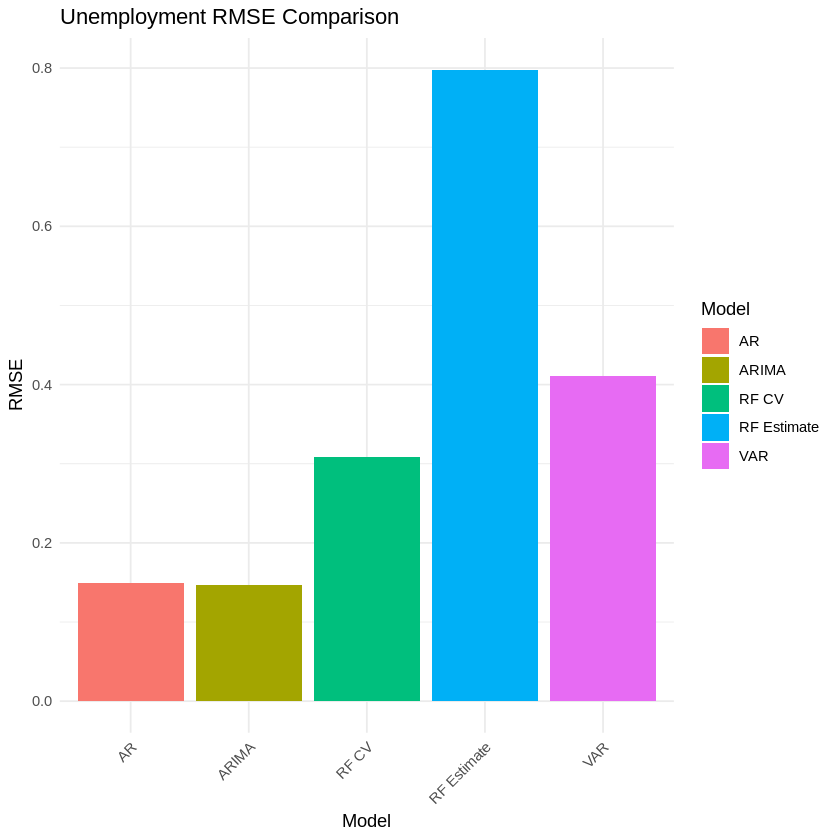

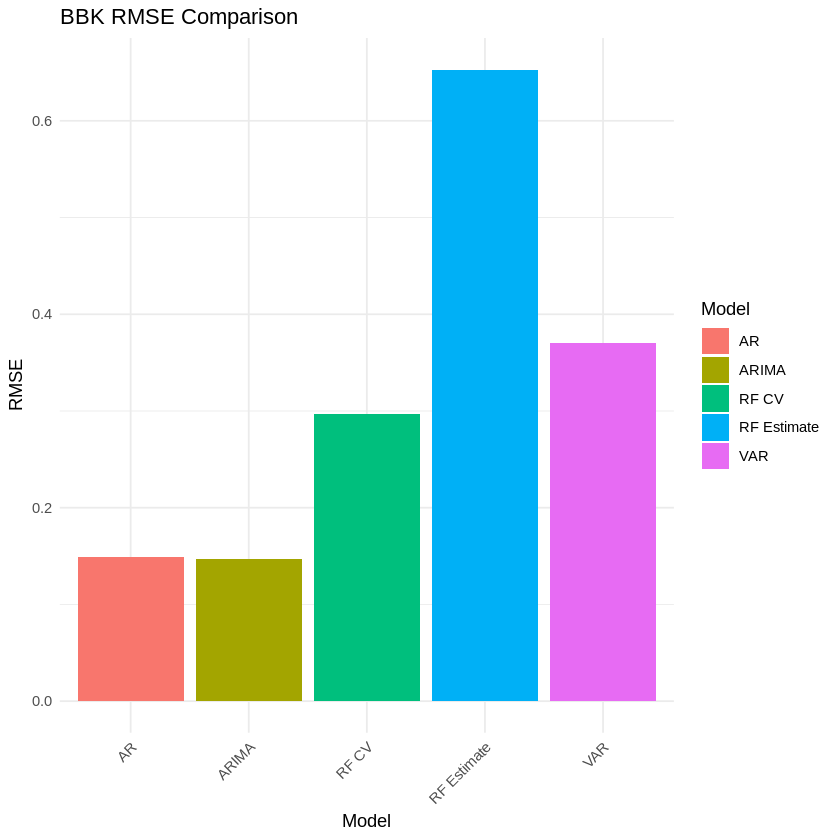

In [ ]:
# 1. Baseline RMSE
# Combine  RMSE results for Baseline
rmse_combined_baseline <- data.frame(
  Model = c(
    as.character(rmse_results_baseline$Model),  # Extract models from rmse_results_baseline
    "RF Estimate",  # Name for final RMSE estimate
    "RF CV"  # Name for test RMSE with cross-validation
  ),
  RMSE = c(
    rmse_results_baseline$RMSE,  # RMSE values for AR, ARIMA, VAR, AR1
    final_rmse_baseline_est,  # Final RMSE estimate
    test_rmse_baseline_cv  # Test RMSE with cross-validation
  )
)

# Plot Baseline RMSE
ggplot(rmse_combined_baseline, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Baseline RMSE Comparison",
    x = "Model",
    y = "RMSE"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 2. Zero Lower Bound (ZLB) RMSE
# Combine  RMSE results for ZLB
rmse_combined_zlb <- data.frame(
  Model = c(
    as.character(rmse_results_zlb$Model),  # Extract models from rmse_results_baseline
    "RF Estimate",  # Name for final RMSE estimate
    "RF CV"  # Name for test RMSE with cross-validation
  ),
  RMSE = c(
    rmse_results_zlb$RMSE,  # RMSE values for AR, ARIMA, VAR, AR1
    final_rmse_baseline_est,  # Final RMSE estimate
    test_rmse_baseline_cv  # Test RMSE with cross-validation
  )
)

# Plot Baseline RMSE
ggplot(rmse_combined_zlb, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(
    title = "ZLB RMSE Comparison",
    x = "Model",
    y = "RMSE"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 3. Drop Unemployment RMSE
# Combine RMSE results for Unemployment
rmse_combined_unemployment <- data.frame(
  Model = c(
    as.character(rmse_results_unemployment$Model),  # Models from rmse_results_unemployment
    "RF Estimate",
    "RF CV"
  ),
  RMSE = c(
    rmse_results_unemployment$RMSE,  # RMSE for AR, ARIMA, VAR, AR1
    final_rmse_unemployment_est,
    test_rmse_unemployment_cv
  )
)

# Plot Unemployment RMSE
ggplot(rmse_combined_unemployment, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Unemployment RMSE Comparison",
    x = "Model",
    y = "RMSE"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 4. BBK DGP RMSE
# Combine RMSE results for BBK
rmse_combined_bbk <- data.frame(
  Model = c(
    as.character(rmse_results_bbk$Model),  # Models from rmse_results_bbk
    "RF Estimate",
    "RF CV"
  ),
  RMSE = c(
    rmse_results_bbk$RMSE,  # RMSE for AR, ARIMA, VAR, AR1
    final_rmse_bbk_est,
    test_rmse_bbk_cv
  )
)

# Plot BBK RMSE
ggplot(rmse_combined_bbk, aes(x = Model, y = RMSE, fill = Model)) +
  geom_bar(stat = "identity") +
  labs(
    title = "BBK RMSE Comparison",
    x = "Model",
    y = "RMSE"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))



## Tables for ADF test results

In [ ]:
# Combine ADF test results into a table for raw and differenced variables
adf_raw_results <- data.frame(
  Variable = c("GDPPROXY", "FEDFUNDS", "UNRATE", "CPIAUCSL"),
  Statistic = c(-4.25, -3.49, -2.71, -2.52),  # Replace with actual test results
  P_Value = c(0.01, 0.044, 0.278, 0.356)
)

adf_diff_results <- data.frame(
  Variable = c("Differenced CPI", "Differenced UNRATE"),
  Statistic = c(-7.79, -3.89),  # Replace with actual test results
  P_Value = c(0.01, 0.014)
)

print("ADF Test Results for Raw Variables")
print(adf_raw_results)

print("ADF Test Results for Differenced Variables")
print(adf_diff_results)


[1] "ADF Test Results for Raw Variables"
  Variable Statistic P_Value
1 GDPPROXY     -4.25   0.010
2 FEDFUNDS     -3.49   0.044
3   UNRATE     -2.71   0.278
4 CPIAUCSL     -2.52   0.356
[1] "ADF Test Results for Differenced Variables"
            Variable Statistic P_Value
1    Differenced CPI     -7.79   0.010
2 Differenced UNRATE     -3.89   0.014
